#Data cleaning & Feature Engineering


In [ ]:
import pandas as pd
df=pd.read_excel('Cancer patient data.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  8468 non-null   datetime64[ns]
 1   DEATH_DATE_off  447 non-null    datetime64[ns]
 2   sex             8468 non-null   object        
 3   race            8466 non-null   object        
 4   LUNG            8468 non-null   int64         
 5   PANCREAS        8468 non-null   int64         
 6   THYROID         8468 non-null   int64         
 7   COLORECTAL      8468 non-null   int64         
 8   MELANOMA        8468 non-null   int64         
 9   LUNG DT         1485 non-null   datetime64[ns]
 10  PANCREAS_DT     660 non-null    datetime64[ns]
 11  THYROID_DT      745 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
dtypes: datetime64[ns](7), int64(5), object(2)
memory usage: 

In [ ]:
# remove all pt who do not have a diag date, 5 disease in total
df['count']=0
mylist=[]
ml2=[]
for index, row in df.iterrows():
    count=0
    ml3=[]
    if(pd.isnull(row['LUNG DT'])):
      count+=1
      #print('***')
    if(pd.isnull(row['PANCREAS_DT'])):
      count+=1
    if(pd.isnull(row['THYROID_DT'])):
      count+=1
    if(pd.isnull(row['COLORECTAL_DT'])):
      count+=1
    if(pd.isnull(row['MELANOMA_DT'])):
      count+=1
    
    if (not pd.isnull(row['LUNG DT'])):
      ml3.append(row['LUNG DT'])
    if (not pd.isnull(row['PANCREAS_DT'])):
      ml3.append(row['PANCREAS_DT'])
    if (not pd.isnull(row['THYROID_DT'])):
      ml3.append(row['THYROID_DT'])
    if (not pd.isnull(row['COLORECTAL_DT'])):
      ml3.append(row['COLORECTAL_DT'])
    if (not pd.isnull(row['MELANOMA_DT'])):
      ml3.append(row['MELANOMA_DT'])

    mylist.append(count)
    ml2.append(ml3)
  

In [ ]:
dfml=pd.DataFrame(mylist)
dfml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       8468 non-null   int64
dtypes: int64(1)
memory usage: 66.3 KB


In [ ]:
dfml2=pd.DataFrame(ml2)
#print(dfml2[0].value_counts())
#print('_________')
#print(dfml2[1].value_counts())
dfml2

,0,1
0,2013-09-01,NaT
1,2016-04-02,NaT
2,2015-04-11,NaT
3,NaT,NaT
4,NaT,NaT
...,...,...
8463,2015-02-06,NaT
8464,NaT,NaT
8465,NaT,NaT
8466,2013-01-06,NaT


In [ ]:
df2=pd.concat([df, dfml.reindex(df.index)], axis=1)
df2=df2.drop(columns={'count'})
df2.columns = [*df2.columns[:-1], 'Count']
df2

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Count
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,4
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,4
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,4
3,1932-07-28,NaT,Female,Black/African-American,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT,5
4,1943-04-17,NaT,Male,White,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,1948-11-28,NaT,Male,More than one Race,0,0,1,0,0,NaT,NaT,2015-02-06,NaT,NaT,4
8464,1938-07-05,NaT,Female,White,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT,5
8465,1958-06-05,NaT,Female,Black/African-American,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT,5
8466,1955-12-29,NaT,Female,White,0,0,0,0,1,NaT,NaT,NaT,NaT,2013-01-06,4


In [ ]:
df3=pd.concat([df2, dfml2.reindex(df2.index)], axis=1)
df3

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Count,0,1
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,4,2013-09-01,NaT
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,4,2016-04-02,NaT
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,4,2015-04-11,NaT
3,1932-07-28,NaT,Female,Black/African-American,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT,5,NaT,NaT
4,1943-04-17,NaT,Male,White,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT,5,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,1948-11-28,NaT,Male,More than one Race,0,0,1,0,0,NaT,NaT,2015-02-06,NaT,NaT,4,2015-02-06,NaT
8464,1938-07-05,NaT,Female,White,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT,5,NaT,NaT
8465,1958-06-05,NaT,Female,Black/African-American,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT,5,NaT,NaT
8466,1955-12-29,NaT,Female,White,0,0,0,0,1,NaT,NaT,NaT,NaT,2013-01-06,4,2013-01-06,NaT


In [ ]:
df3['Count'].value_counts()

5    4315
4    4124
3      29
Name: Count, dtype: int64

In [ ]:
#Remove all patients who do not have a diagnosis date.
df3=df3[df3['Count']!=5]
df3['Count'].value_counts()

4    4124
3      29
Name: Count, dtype: int64

In [ ]:
df3.rename(columns={ df3.columns[16]: "date2" }, inplace = True)
df3.rename(columns={ df3.columns[15]: "date1" }, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df3.info()
df3.head(10)
df3=df3.reset_index()
df3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4153 entries, 0 to 8467
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  4153 non-null   datetime64[ns]
 1   DEATH_DATE_off  326 non-null    datetime64[ns]
 2   sex             4153 non-null   object        
 3   race            4151 non-null   object        
 4   LUNG            4153 non-null   int64         
 5   PANCREAS        4153 non-null   int64         
 6   THYROID         4153 non-null   int64         
 7   COLORECTAL      4153 non-null   int64         
 8   MELANOMA        4153 non-null   int64         
 9   LUNG DT         1485 non-null   datetime64[ns]
 10  PANCREAS_DT     660 non-null    datetime64[ns]
 11  THYROID_DT      745 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
 14  Count           4153 non-null   int64         
 15  date

,index,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Count,date1,date2
0,0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,4,2013-09-01,NaT
1,1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,4,2016-04-02,NaT
2,2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,4,2015-04-11,NaT
3,6,1946-11-03,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,4,2012-11-29,NaT
4,7,1938-06-10,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,4,2012-06-24,NaT


In [ ]:

#Calculate the age of each patient at the time of cancer diagnosis.
#df2['BIRTH_DATE_off'][0].year  ----> 1959
lyear=[]
for index, row in df3.iterrows():
  lyear.append(row['date1'].year-row['BIRTH_DATE_off'].year)
len(lyear)


4153

In [ ]:

dflyear=pd.DataFrame(lyear)
dflyear.columns = [*dflyear.columns[:-1], 'year1']
dflyear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year1   4153 non-null   int64
dtypes: int64(1)
memory usage: 32.6 KB


In [ ]:
df3=df3.reset_index()
df4 = pd.concat([df3, dflyear],axis=1,join='inner')
#df4= df3.append(dflyear)
#df4.head(5)
df4.info()
df4.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   level_0         4153 non-null   int64         
 1   index           4153 non-null   int64         
 2   BIRTH_DATE_off  4153 non-null   datetime64[ns]
 3   DEATH_DATE_off  326 non-null    datetime64[ns]
 4   sex             4153 non-null   object        
 5   race            4151 non-null   object        
 6   LUNG            4153 non-null   int64         
 7   PANCREAS        4153 non-null   int64         
 8   THYROID         4153 non-null   int64         
 9   COLORECTAL      4153 non-null   int64         
 10  MELANOMA        4153 non-null   int64         
 11  LUNG DT         1485 non-null   datetime64[ns]
 12  PANCREAS_DT     660 non-null    datetime64[ns]
 13  THYROID_DT      745 non-null    datetime64[ns]
 14  COLORECTAL_DT   946 non-null    datetime64[ns]
 15  MELA

,level_0,index,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Count,date1,date2,year1
0,0,0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,4,2013-09-01,NaT,54
1,1,1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,4,2016-04-02,NaT,61
2,2,2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,4,2015-04-11,NaT,69
3,3,6,1946-11-03,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,4,2012-11-29,NaT,66
4,4,7,1938-06-10,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,4,2012-06-24,NaT,74
5,5,9,1957-10-18,NaT,Male,Black/African-American,1,0,0,0,0,2012-11-29,NaT,NaT,NaT,NaT,4,2012-11-29,NaT,55
6,6,12,1940-02-04,NaT,Male,Black/African-American,1,0,0,0,0,2013-05-21,NaT,NaT,NaT,NaT,4,2013-05-21,NaT,73
7,7,13,1971-08-11,NaT,Female,Black/African-American,0,0,0,1,0,NaT,NaT,NaT,2014-01-01,NaT,4,2014-01-01,NaT,43
8,8,14,1948-03-22,2016-01-07,Female,Black/African-American,0,0,0,1,0,NaT,NaT,NaT,2014-09-30,NaT,4,2014-09-30,NaT,66
9,9,15,1940-12-24,2012-09-30,Female,Black/African-American,1,0,0,0,0,2012-09-26,NaT,NaT,NaT,NaT,4,2012-09-26,NaT,72


In [ ]:
lyear2=[]
for index, row in df3.iterrows():
  if(not pd.isnull(row['date2'])):
    year2=row['date2'].year-row['BIRTH_DATE_off'].year
  else:
    year2=100
  lyear2.append(year2)
#lyear2

In [ ]:
dflyear2=pd.DataFrame(lyear2)
dflyear2.columns = [*dflyear.columns[:-1], 'year2']
dflyear2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year2   4153 non-null   int64
dtypes: int64(1)
memory usage: 32.6 KB


In [ ]:
#df4=df4.reset_index()
df5 = pd.concat([df4, dflyear2], axis=1, join='inner')
df5.info()
df5.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   level_0         4153 non-null   int64         
 1   index           4153 non-null   int64         
 2   BIRTH_DATE_off  4153 non-null   datetime64[ns]
 3   DEATH_DATE_off  326 non-null    datetime64[ns]
 4   sex             4153 non-null   object        
 5   race            4151 non-null   object        
 6   LUNG            4153 non-null   int64         
 7   PANCREAS        4153 non-null   int64         
 8   THYROID         4153 non-null   int64         
 9   COLORECTAL      4153 non-null   int64         
 10  MELANOMA        4153 non-null   int64         
 11  LUNG DT         1485 non-null   datetime64[ns]
 12  PANCREAS_DT     660 non-null    datetime64[ns]
 13  THYROID_DT      745 non-null    datetime64[ns]
 14  COLORECTAL_DT   946 non-null    datetime64[ns]
 15  MELA

,level_0,index,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Count,date1,date2,year1,year2
0,0,0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,4,2013-09-01,NaT,54,100
1,1,1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,4,2016-04-02,NaT,61,100
2,2,2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,4,2015-04-11,NaT,69,100
3,3,6,1946-11-03,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,4,2012-11-29,NaT,66,100
4,4,7,1938-06-10,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,4,2012-06-24,NaT,74,100
5,5,9,1957-10-18,NaT,Male,Black/African-American,1,0,0,0,0,2012-11-29,NaT,NaT,NaT,NaT,4,2012-11-29,NaT,55,100
6,6,12,1940-02-04,NaT,Male,Black/African-American,1,0,0,0,0,2013-05-21,NaT,NaT,NaT,NaT,4,2013-05-21,NaT,73,100
7,7,13,1971-08-11,NaT,Female,Black/African-American,0,0,0,1,0,NaT,NaT,NaT,2014-01-01,NaT,4,2014-01-01,NaT,43,100
8,8,14,1948-03-22,2016-01-07,Female,Black/African-American,0,0,0,1,0,NaT,NaT,NaT,2014-09-30,NaT,4,2014-09-30,NaT,66,100
9,9,15,1940-12-24,2012-09-30,Female,Black/African-American,1,0,0,0,0,2012-09-26,NaT,NaT,NaT,NaT,4,2012-09-26,NaT,72,100


In [ ]:
'''
age_daig=[]
for index, row in df3.iterrows():
  if row['year1']<=row['year2']:
    age_diag.append(row['year1'])
  else:
    age_diag.append(row['year2'])
df_age_diag=pd.DataFrame(age_diag)
df6= df5.append(df_age_diag, ignore_index=True)
df6.info()
'''

"\nage_daig=[]\nfor index, row in df3.iterrows():\n  if row['year1']<=row['year2']:\n    age_diag.append(row['year1'])\n  else:\n    age_diag.append(row['year2'])\ndf_age_diag=pd.DataFrame(age_diag)\ndf6= df5.append(df_age_diag, ignore_index=True)\ndf6.info()\n"

In [ ]:
print(df5['date1'][0] < pd.Timestamp(2016, 8, 25))

True


In [ ]:
df5=df5[df5['date1']<pd.Timestamp(2016, 8, 25)]
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4147 entries, 0 to 4152
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   level_0         4147 non-null   int64         
 1   index           4147 non-null   int64         
 2   BIRTH_DATE_off  4147 non-null   datetime64[ns]
 3   DEATH_DATE_off  326 non-null    datetime64[ns]
 4   sex             4147 non-null   object        
 5   race            4145 non-null   object        
 6   LUNG            4147 non-null   int64         
 7   PANCREAS        4147 non-null   int64         
 8   THYROID         4147 non-null   int64         
 9   COLORECTAL      4147 non-null   int64         
 10  MELANOMA        4147 non-null   int64         
 11  LUNG DT         1483 non-null   datetime64[ns]
 12  PANCREAS_DT     658 non-null    datetime64[ns]
 13  THYROID_DT      743 non-null    datetime64[ns]
 14  COLORECTAL_DT   946 non-null    datetime64[ns]
 15  MELA

In [ ]:
df5 = pd.get_dummies(df5, columns=['sex'])
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4147 entries, 0 to 4152
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   level_0         4147 non-null   int64         
 1   index           4147 non-null   int64         
 2   BIRTH_DATE_off  4147 non-null   datetime64[ns]
 3   DEATH_DATE_off  326 non-null    datetime64[ns]
 4   race            4145 non-null   object        
 5   LUNG            4147 non-null   int64         
 6   PANCREAS        4147 non-null   int64         
 7   THYROID         4147 non-null   int64         
 8   COLORECTAL      4147 non-null   int64         
 9   MELANOMA        4147 non-null   int64         
 10  LUNG DT         1483 non-null   datetime64[ns]
 11  PANCREAS_DT     658 non-null    datetime64[ns]
 12  THYROID_DT      743 non-null    datetime64[ns]
 13  COLORECTAL_DT   946 non-null    datetime64[ns]
 14  MELANOMA_DT     346 non-null    datetime64[ns]
 15  Coun

In [ ]:
df5['race'].value_counts()

White                                     2814
Black/African-American                     956
Unknown                                    163
Asian/Mideast Indian                       117
More than one Race                          49
Patient Declined                            25
Native Hawaiian/Other Pacific Islander      17
American Indian or Alaska Native             4
Name: race, dtype: int64

In [ ]:
df6=df5

In [ ]:

def racex(x):
  if x=='White':
    return 'W'
  elif x=='Black/African-American':
    return 'B'
  elif x=='Asian/Mideast Indian':
    return 'A'
  else:
    return 'O'
df6['race']=df6['race'].apply(lambda x: racex(x))
df6.head()

,level_0,index,BIRTH_DATE_off,DEATH_DATE_off,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Count,date1,date2,year1,year2,sex_Female,sex_Male
0,0,0,1959-12-02,NaT,B,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,4,2013-09-01,NaT,54,100,0,1
1,1,1,1955-11-18,2016-04-20,B,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,4,2016-04-02,NaT,61,100,0,1
2,2,2,1946-01-14,2015-05-25,B,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,4,2015-04-11,NaT,69,100,1,0
3,3,6,1946-11-03,NaT,B,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,4,2012-11-29,NaT,66,100,1,0
4,4,7,1938-06-10,NaT,B,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,4,2012-06-24,NaT,74,100,1,0


In [ ]:
'''
df6 = pd.get_dummies(df6, columns=['race'])
df6.info()
'''

"\ndf6 = pd.get_dummies(df6, columns=['race'])\ndf6.info()\n"

In [ ]:
lung_age=[]
for index, row in df3.iterrows():
  if(not pd.isnull(row['LUNG DT'])):
    year=row['LUNG DT'].year-row['BIRTH_DATE_off'].year
  else:
    year=0
  lung_age.append(year)
df_lung_age=pd.DataFrame(lung_age)
df_lung_age.columns = [*df_lung_age.columns[:-1], 'lung_age']
#df6=df6.reset_index()
df7 = pd.concat([df6, df_lung_age], axis=1,join='inner')
df7['lung_age'].value_counts()

0     2664
71      60
67      59
63      58
68      57
      ... 
95       1
97       1
96       1
98       1
93       1
Name: lung_age, Length: 75, dtype: int64

In [ ]:
df7[df7['lung_age']==98]

,level_0,index,BIRTH_DATE_off,DEATH_DATE_off,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Count,date1,date2,year1,year2,sex_Female,sex_Male,lung_age
274,274,598,1917-05-25,NaT,W,1,0,0,0,0,2015-09-17,NaT,NaT,NaT,NaT,4,2015-09-17,NaT,98,100,1,0,98


In [ ]:
pancreas_age=[]
for index, row in df3.iterrows():
  if(not pd.isnull(row['PANCREAS_DT'])):
    year=row['PANCREAS_DT'].year-row['BIRTH_DATE_off'].year
  else:
    year=0
  pancreas_age.append(year)
df_pancreas_age=pd.DataFrame(pancreas_age)
df_pancreas_age.columns = [*df_pancreas_age.columns[:-1], 'pancreas_age']
#df7=df7.reset_index()
df8 = pd.concat([df7, df_pancreas_age], axis=1, join='inner')
df8['pancreas_age'].value_counts()

0     3489
68      31
64      27
73      25
72      25
      ... 
97       1
30       1
33       1
94       1
44       1
Name: pancreas_age, Length: 64, dtype: int64

In [ ]:
thyroid_age=[]
for index, row in df3.iterrows():
  if(not pd.isnull(row['THYROID_DT'])):
    year=row['THYROID_DT'].year-row['BIRTH_DATE_off'].year
  else:
    year=0
  thyroid_age.append(year)
df_thyroid_age=pd.DataFrame(thyroid_age)
df_thyroid_age.columns = [*df_thyroid_age.columns[:-1], 'thyroid_age']
#df8=df8.reset_index()
df9 = pd.concat([df8, df_thyroid_age], axis=1, join='inner')
df9['thyroid_age'].value_counts()

0     3404
61      25
66      23
54      22
53      20
      ... 
7        1
12       1
86       1
78       1
10       1
Name: thyroid_age, Length: 81, dtype: int64

In [ ]:
colorectal_age=[]
for index, row in df3.iterrows():
  if(not pd.isnull(row['COLORECTAL_DT'])):
    year=row['COLORECTAL_DT'].year-row['BIRTH_DATE_off'].year
  else:
    year=0
  colorectal_age.append(year)
df_colorectal_age=pd.DataFrame(colorectal_age)
df_colorectal_age.columns = [*df_colorectal_age.columns[:-1], 'colorectal_age']
#df9=df9.reset_index()
df10 = pd.concat([df9, df_colorectal_age], axis=1, join='inner')
df10['colorectal_age'].value_counts()

0     3201
64      34
58      34
65      32
62      32
      ... 
96       1
93       1
95       1
20       1
16       1
Name: colorectal_age, Length: 73, dtype: int64

In [ ]:
melanoma_age=[]
for index, row in df3.iterrows():
  if(not pd.isnull(row['MELANOMA_DT'])):
    year=row['MELANOMA_DT'].year-row['BIRTH_DATE_off'].year
  else:
    year=0
  melanoma_age.append(year)
df_melanoma_age=pd.DataFrame(melanoma_age)
df_melanoma_age.columns = [*df_melanoma_age.columns[:-1], 'melanoma_age']
#df10=df10.reset_index()
df11 = pd.concat([df10, df_melanoma_age], axis=1, join='inner')
df11['melanoma_age'].value_counts()

0     3801
59      13
79      12
63      12
70      11
      ... 
96       1
28       1
25       1
19       1
83       1
Name: melanoma_age, Length: 77, dtype: int64

In [ ]:
df11.info()
df11.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4147 entries, 0 to 4152
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   level_0         4147 non-null   int64         
 1   index           4147 non-null   int64         
 2   BIRTH_DATE_off  4147 non-null   datetime64[ns]
 3   DEATH_DATE_off  326 non-null    datetime64[ns]
 4   race            4147 non-null   object        
 5   LUNG            4147 non-null   int64         
 6   PANCREAS        4147 non-null   int64         
 7   THYROID         4147 non-null   int64         
 8   COLORECTAL      4147 non-null   int64         
 9   MELANOMA        4147 non-null   int64         
 10  LUNG DT         1483 non-null   datetime64[ns]
 11  PANCREAS_DT     658 non-null    datetime64[ns]
 12  THYROID_DT      743 non-null    datetime64[ns]
 13  COLORECTAL_DT   946 non-null    datetime64[ns]
 14  MELANOMA_DT     346 non-null    datetime64[ns]
 15  Coun

,level_0,index,BIRTH_DATE_off,DEATH_DATE_off,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Count,date1,date2,year1,year2,sex_Female,sex_Male,lung_age,pancreas_age,thyroid_age,colorectal_age,melanoma_age
0,0,0,1959-12-02,NaT,B,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,4,2013-09-01,NaT,54,100,0,1,54,0,0,0,0
1,1,1,1955-11-18,2016-04-20,B,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,4,2016-04-02,NaT,61,100,0,1,61,0,0,0,0
2,2,2,1946-01-14,2015-05-25,B,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,4,2015-04-11,NaT,69,100,1,0,69,0,0,0,0
3,3,6,1946-11-03,NaT,B,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,4,2012-11-29,NaT,66,100,1,0,0,0,66,0,0
4,4,7,1938-06-10,NaT,B,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,4,2012-06-24,NaT,74,100,1,0,0,0,74,0,0
5,5,9,1957-10-18,NaT,B,1,0,0,0,0,2012-11-29,NaT,NaT,NaT,NaT,4,2012-11-29,NaT,55,100,0,1,55,0,0,0,0
6,6,12,1940-02-04,NaT,B,1,0,0,0,0,2013-05-21,NaT,NaT,NaT,NaT,4,2013-05-21,NaT,73,100,0,1,73,0,0,0,0
7,7,13,1971-08-11,NaT,B,0,0,0,1,0,NaT,NaT,NaT,2014-01-01,NaT,4,2014-01-01,NaT,43,100,1,0,0,0,0,43,0
8,8,14,1948-03-22,2016-01-07,B,0,0,0,1,0,NaT,NaT,NaT,2014-09-30,NaT,4,2014-09-30,NaT,66,100,1,0,0,0,0,66,0
9,9,15,1940-12-24,2012-09-30,B,1,0,0,0,0,2012-09-26,NaT,NaT,NaT,NaT,4,2012-09-26,NaT,72,100,1,0,72,0,0,0,0


In [ ]:
def die(x):
  if x > pd.Timestamp(2016, 8, 25):
    return 1
  else:
    return 0
df11['died_after_date']=df11['DEATH_DATE_off'].map(lambda x:die(x) )
df11['died_after_date'].value_counts()

0    4118
1      29
Name: died_after_date, dtype: int64

In [ ]:
lung_df=df11[df11['LUNG']==1]
lung_df=lung_df[['BIRTH_DATE_off','DEATH_DATE_off','died_after_date','LUNG','LUNG DT','sex_Female','sex_Male','race','lung_age']]
def agegroup(x):
  if x<21:
    return '<20'
  if 20<x<31:
    return '21-30'
  if 30<x<41:
    return '31-40'
  if 40<x<51:
    return '41-50'
  if 50<x<61:
    return '51-60'
  if 60<x<71:
    return '61-70'
  if 70<x<81:
    return '71-80'
  if 80<x<91:
    return '81-90'
  else:
    return '>90'
lung_df['lung_agegroup']=lung_df['lung_age'].map(lambda x:agegroup(x))
lung_df.info()
lung_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 0 to 4147
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   BIRTH_DATE_off   1483 non-null   datetime64[ns]
 1   DEATH_DATE_off   196 non-null    datetime64[ns]
 2   died_after_date  1483 non-null   int64         
 3   LUNG             1483 non-null   int64         
 4   LUNG DT          1483 non-null   datetime64[ns]
 5   sex_Female       1483 non-null   uint8         
 6   sex_Male         1483 non-null   uint8         
 7   race             1483 non-null   object        
 8   lung_age         1483 non-null   int64         
 9   lung_agegroup    1483 non-null   object        
dtypes: datetime64[ns](3), int64(3), object(2), uint8(2)
memory usage: 107.2+ KB


,BIRTH_DATE_off,DEATH_DATE_off,died_after_date,LUNG,LUNG DT,sex_Female,sex_Male,race,lung_age,lung_agegroup
0,1959-12-02,NaT,0,1,2013-09-01,0,1,B,54,51-60
1,1955-11-18,2016-04-20,0,1,2016-04-02,0,1,B,61,61-70
2,1946-01-14,2015-05-25,0,1,2015-04-11,1,0,B,69,61-70
5,1957-10-18,NaT,0,1,2012-11-29,0,1,B,55,51-60
6,1940-02-04,NaT,0,1,2013-05-21,0,1,B,73,71-80
9,1940-12-24,2012-09-30,0,1,2012-09-26,1,0,B,72,71-80
11,1953-01-17,2014-01-20,0,1,2013-11-16,1,0,B,60,51-60
12,1953-08-25,NaT,0,1,2015-01-14,0,1,B,62,61-70
13,1934-03-17,2014-12-29,0,1,2014-03-26,0,1,B,80,71-80
14,1950-05-16,NaT,0,1,2014-07-07,1,0,B,64,61-70


In [ ]:
pancreas_df=df11[df11['PANCREAS']==1]
pancreas_df=pancreas_df[['BIRTH_DATE_off','DEATH_DATE_off','died_after_date','PANCREAS','PANCREAS_DT','sex_Female','sex_Male','race','pancreas_age']]
def agegroup(x):
  if x<21:
    return '<20'
  if 20<x<31:
    return '21-30'
  if 30<x<41:
    return '31-40'
  if 40<x<51:
    return '41-50'
  if 50<x<61:
    return '51-60'
  if 60<x<71:
    return '61-70'
  if 70<x<81:
    return '71-80'
  if 80<x<91:
    return '81-90'
  else:
    return '>90'
pancreas_df['pancreas_agegroup']=pancreas_df['pancreas_age'].map(lambda x:agegroup(x))
pancreas_df.info()
pancreas_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 24 to 4137
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BIRTH_DATE_off     658 non-null    datetime64[ns]
 1   DEATH_DATE_off     44 non-null     datetime64[ns]
 2   died_after_date    658 non-null    int64         
 3   PANCREAS           658 non-null    int64         
 4   PANCREAS_DT        658 non-null    datetime64[ns]
 5   sex_Female         658 non-null    uint8         
 6   sex_Male           658 non-null    uint8         
 7   race               658 non-null    object        
 8   pancreas_age       658 non-null    int64         
 9   pancreas_agegroup  658 non-null    object        
dtypes: datetime64[ns](3), int64(3), object(2), uint8(2)
memory usage: 47.6+ KB


,BIRTH_DATE_off,DEATH_DATE_off,died_after_date,PANCREAS,PANCREAS_DT,sex_Female,sex_Male,race,pancreas_age,pancreas_agegroup
24,1955-03-10,2012-11-22,0,1,2012-10-12,1,0,B,57,51-60
30,1929-06-27,NaT,0,1,2016-01-27,1,0,B,87,81-90
32,1938-06-24,NaT,0,1,2013-11-19,0,1,W,75,71-80
43,1952-08-30,2016-11-21,1,1,2014-10-27,0,1,B,62,61-70
53,1956-07-15,2016-04-22,0,1,2016-03-13,0,1,B,60,51-60
62,1958-03-09,NaT,0,1,2014-09-16,0,1,B,56,51-60
79,1936-06-18,2013-09-07,0,1,2012-06-06,1,0,B,76,71-80
95,1950-10-27,NaT,0,1,2013-01-17,1,0,B,63,61-70
101,1930-08-11,NaT,0,1,2012-12-11,0,1,B,82,81-90
103,1919-11-07,2013-11-02,0,1,2013-05-28,1,0,B,94,>90


In [ ]:
thyroid_df=df11[df11['THYROID']==1]
thyroid_df=thyroid_df[['BIRTH_DATE_off','DEATH_DATE_off','died_after_date','THYROID','THYROID_DT','sex_Female','sex_Male','race','thyroid_age']]
def agegroup(x):
  if x<21:
    return '<20'
  if 20<x<31:
    return '21-30'
  if 30<x<41:
    return '31-40'
  if 40<x<51:
    return '41-50'
  if 50<x<61:
    return '51-60'
  if 60<x<71:
    return '61-70'
  if 70<x<81:
    return '71-80'
  if 80<x<91:
    return '81-90'
  else:
    return '>90'
thyroid_df['thyroid_agegroup']=thyroid_df['thyroid_age'].map(lambda x:agegroup(x))
thyroid_df.info()
thyroid_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 3 to 4150
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BIRTH_DATE_off    743 non-null    datetime64[ns]
 1   DEATH_DATE_off    8 non-null      datetime64[ns]
 2   died_after_date   743 non-null    int64         
 3   THYROID           743 non-null    int64         
 4   THYROID_DT        743 non-null    datetime64[ns]
 5   sex_Female        743 non-null    uint8         
 6   sex_Male          743 non-null    uint8         
 7   race              743 non-null    object        
 8   thyroid_age       743 non-null    int64         
 9   thyroid_agegroup  743 non-null    object        
dtypes: datetime64[ns](3), int64(3), object(2), uint8(2)
memory usage: 53.7+ KB


,BIRTH_DATE_off,DEATH_DATE_off,died_after_date,THYROID,THYROID_DT,sex_Female,sex_Male,race,thyroid_age,thyroid_agegroup
3,1946-11-03,NaT,0,1,2012-11-29,1,0,B,66,61-70
4,1938-06-10,NaT,0,1,2012-06-24,1,0,B,74,71-80
15,1948-02-17,NaT,0,1,2012-09-02,1,0,B,64,61-70
18,1949-09-04,NaT,0,1,2014-03-19,1,0,W,65,61-70
45,1949-12-15,NaT,0,1,2013-02-26,1,0,B,64,61-70
59,1979-11-18,NaT,0,1,2016-05-08,1,0,B,37,31-40
71,1960-02-26,NaT,0,1,2008-02-13,1,0,B,48,41-50
83,1928-10-10,NaT,0,1,2015-01-04,0,1,B,87,81-90
113,1952-12-06,NaT,0,1,2013-12-25,1,0,O,61,61-70
114,1965-03-15,NaT,0,1,2014-03-17,1,0,W,49,41-50


In [ ]:
colorectal_df=df11[df11['COLORECTAL']==1]
colorectal_df=colorectal_df[['BIRTH_DATE_off','DEATH_DATE_off','died_after_date','COLORECTAL','COLORECTAL_DT','sex_Female','sex_Male','race','colorectal_age']]
def agegroup(x):
  if x<21:
    return '<20'
  if 20<x<31:
    return '21-30'
  if 30<x<41:
    return '31-40'
  if 40<x<51:
    return '41-50'
  if 50<x<61:
    return '51-60'
  if 60<x<71:
    return '61-70'
  if 70<x<81:
    return '71-80'
  if 80<x<91:
    return '81-90'
  else:
    return '>90'
colorectal_df['colorectal_agegroup']=colorectal_df['colorectal_age'].map(lambda x:agegroup(x))
colorectal_df.info()
colorectal_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 7 to 4148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   BIRTH_DATE_off       946 non-null    datetime64[ns]
 1   DEATH_DATE_off       64 non-null     datetime64[ns]
 2   died_after_date      946 non-null    int64         
 3   COLORECTAL           946 non-null    int64         
 4   COLORECTAL_DT        946 non-null    datetime64[ns]
 5   sex_Female           946 non-null    uint8         
 6   sex_Male             946 non-null    uint8         
 7   race                 946 non-null    object        
 8   colorectal_age       946 non-null    int64         
 9   colorectal_agegroup  946 non-null    object        
dtypes: datetime64[ns](3), int64(3), object(2), uint8(2)
memory usage: 68.4+ KB


,BIRTH_DATE_off,DEATH_DATE_off,died_after_date,COLORECTAL,COLORECTAL_DT,sex_Female,sex_Male,race,colorectal_age,colorectal_agegroup
7,1971-08-11,NaT,0,1,2014-01-01,1,0,B,43,41-50
8,1948-03-22,2016-01-07,0,1,2014-09-30,1,0,B,66,61-70
10,1946-01-09,NaT,0,1,2013-09-14,1,0,B,67,61-70
19,1970-12-19,NaT,0,1,2013-12-09,1,0,W,43,41-50
22,1928-03-25,NaT,0,1,2013-12-11,1,0,B,85,81-90
25,1947-06-12,2013-03-24,0,1,2009-07-30,0,1,B,62,61-70
26,1922-10-14,NaT,0,1,2014-12-10,0,1,O,92,>90
29,1948-03-25,NaT,0,1,2015-10-07,1,0,B,67,61-70
33,1940-09-15,NaT,0,1,2014-10-20,1,0,B,74,71-80
36,1945-02-28,NaT,0,1,2013-11-19,1,0,B,68,61-70


In [ ]:
melanoma_df=df11[df11['MELANOMA']==1]
melanoma_df=melanoma_df[['BIRTH_DATE_off','DEATH_DATE_off','died_after_date','MELANOMA','MELANOMA_DT','sex_Female','sex_Male','race','melanoma_age']]
def agegroup(x):
  if x<21:
    return '<20'
  if 20<x<31:
    return '21-30'
  if 30<x<41:
    return '31-40'
  if 40<x<51:
    return '41-50'
  if 50<x<61:
    return '51-60'
  if 60<x<71:
    return '61-70'
  if 70<x<81:
    return '71-80'
  if 80<x<91:
    return '81-90'
  else:
    return '>90'
melanoma_df['melanoma_agegroup']=melanoma_df['melanoma_age'].map(lambda x:agegroup(x))
melanoma_df.info()
melanoma_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 67 to 4152
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BIRTH_DATE_off     346 non-null    datetime64[ns]
 1   DEATH_DATE_off     18 non-null     datetime64[ns]
 2   died_after_date    346 non-null    int64         
 3   MELANOMA           346 non-null    int64         
 4   MELANOMA_DT        346 non-null    datetime64[ns]
 5   sex_Female         346 non-null    uint8         
 6   sex_Male           346 non-null    uint8         
 7   race               346 non-null    object        
 8   melanoma_age       346 non-null    int64         
 9   melanoma_agegroup  346 non-null    object        
dtypes: datetime64[ns](3), int64(3), object(2), uint8(2)
memory usage: 25.0+ KB


,BIRTH_DATE_off,DEATH_DATE_off,died_after_date,MELANOMA,MELANOMA_DT,sex_Female,sex_Male,race,melanoma_age,melanoma_agegroup
67,1928-06-22,NaT,0,1,2015-03-03,0,1,W,87,81-90
80,1933-12-27,2014-11-27,0,1,2012-12-20,0,1,W,79,71-80
90,1924-04-08,NaT,0,1,2014-05-31,1,0,W,90,81-90
157,1957-10-04,NaT,0,1,2013-05-19,1,0,W,56,51-60
164,1966-08-03,NaT,0,1,2015-03-09,0,1,W,49,41-50
173,1921-09-19,NaT,0,1,2012-11-04,0,1,W,91,>90
181,1943-05-05,NaT,0,1,2013-03-02,0,1,W,70,61-70
189,1961-08-24,NaT,0,1,2012-01-09,1,0,W,51,51-60
210,1942-02-04,NaT,0,1,2012-09-19,0,1,W,70,61-70
224,1948-04-17,NaT,0,1,2014-07-13,0,1,W,66,61-70


In [ ]:
#--------------------------
#Survival Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
!pip install lifelines
from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
nc_lung_df=lung_df[lung_df['died_after_date']==0]
def event(x):
  if x> pd.Timestamp(1800, 8, 25):
    return 1
  else:
    return 0
nc_lung_df['event']=nc_lung_df['DEATH_DATE_off'].map(lambda x:event(x))

tte=[]
for index, row in nc_lung_df.iterrows():
  if(not pd.isnull(row['DEATH_DATE_off'])):
    days=row['DEATH_DATE_off']-row['LUNG DT']
  else:
    days=pd.Timestamp(2016, 8, 25)-row['LUNG DT']
  tte.append(days)
print(tte)
df_tte=pd.DataFrame(tte)
nc_lung_df=nc_lung_df.reset_index()
nc_lung_df=pd.concat([nc_lung_df,df_tte],axis=1, join='inner')
nc_lung_df.columns = [*nc_lung_df.columns[:-1], 'duration']


#print(nc_lung_df['duration'].value_counts())
#print(type(nc_lung_df['duration'][0]))
nc_lung_df['duration_m'] = (nc_lung_df['duration'])/np.timedelta64(1, 'M')
nc_lung_df['duration_y'] = (nc_lung_df['duration'])/np.timedelta64(1, 'Y')
nc_lung_df['days']=nc_lung_df['duration'].dt.days.astype('int16')
nc_lung_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


[Timedelta('1089 days 00:00:00'), Timedelta('18 days 00:00:00'), Timedelta('44 days 00:00:00'), Timedelta('1365 days 00:00:00'), Timedelta('1192 days 00:00:00'), Timedelta('4 days 00:00:00'), Timedelta('65 days 00:00:00'), Timedelta('589 days 00:00:00'), Timedelta('278 days 00:00:00'), Timedelta('780 days 00:00:00'), Timedelta('668 days 00:00:00'), Timedelta('1024 days 00:00:00'), Timedelta('268 days 00:00:00'), Timedelta('986 days 00:00:00'), Timedelta('1646 days 00:00:00'), Timedelta('1074 days 00:00:00'), Timedelta('697 days 00:00:00'), Timedelta('832 days 00:00:00'), Timedelta('594 days 00:00:00'), Timedelta('686 days 00:00:00'), Timedelta('508 days 00:00:00'), Timedelta('415 days 00:00:00'), Timedelta('481 days 00:00:00'), Timedelta('1057 days 00:00:00'), Timedelta('364 days 00:00:00'), Timedelta('387 days 00:00:00'), Timedelta('349 days 00:00:00'), Timedelta('27 days 00:00:00'), Timedelta('912 days 00:00:00'), Timedelta('189 days 00:00:00'), Timedelta('412 days 00:00:00'), Timede

,index,BIRTH_DATE_off,DEATH_DATE_off,died_after_date,LUNG,LUNG DT,sex_Female,sex_Male,race,lung_age,lung_agegroup,event,duration,duration_m,duration_y,days
0,0,1959-12-02,NaT,0,1,2013-09-01,0,1,B,54,51-60,0,1089 days,35.778969,2.981581,1089
1,1,1955-11-18,2016-04-20,0,1,2016-04-02,0,1,B,61,61-70,1,18 days,0.591388,0.049282,18
2,2,1946-01-14,2015-05-25,0,1,2015-04-11,1,0,B,69,61-70,1,44 days,1.445615,0.120468,44
3,5,1957-10-18,NaT,0,1,2012-11-29,0,1,B,55,51-60,0,1365 days,44.846917,3.737243,1365
4,6,1940-02-04,NaT,0,1,2013-05-21,0,1,B,73,71-80,0,1192 days,39.163022,3.263585,1192
5,9,1940-12-24,2012-09-30,0,1,2012-09-26,1,0,B,72,71-80,1,4 days,0.131420,0.010952,4
6,11,1953-01-17,2014-01-20,0,1,2013-11-16,1,0,B,60,51-60,1,65 days,2.135567,0.177964,65
7,12,1953-08-25,NaT,0,1,2015-01-14,0,1,B,62,61-70,0,589 days,19.351527,1.612627,589
8,13,1934-03-17,2014-12-29,0,1,2014-03-26,0,1,B,80,71-80,1,278 days,9.133658,0.761138,278
9,14,1950-05-16,NaT,0,1,2014-07-07,1,0,B,64,61-70,0,780 days,25.626810,2.135567,780


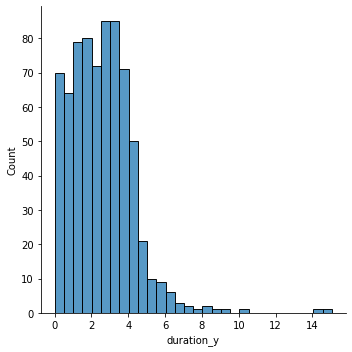

In [ ]:
sb.displot(nc_lung_df[nc_lung_df['sex_Female']==0]['duration_y'])

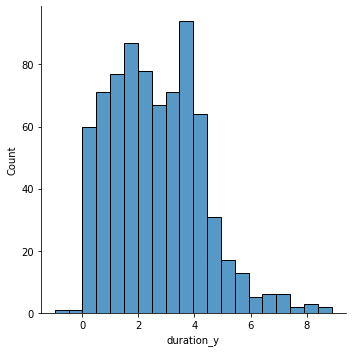

In [ ]:
sb.displot(nc_lung_df[nc_lung_df['sex_Female']==1]['duration_y'])

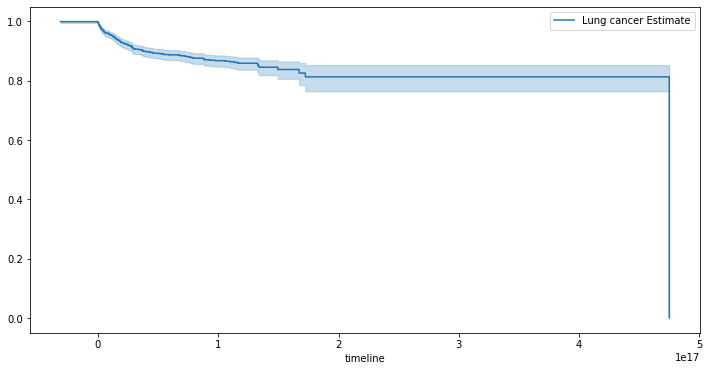

In [ ]:
## Import the library
from lifelines import KaplanMeierFitter


durations = nc_lung_df['duration'] ## Time to event data of censored and event data
event_observed = nc_lung_df['event']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Lung cancer Estimate')

## Create an estimate
km.plot()

In [ ]:
km.survival_function_

,Lung cancer Estimate
timeline,
-3.110400e+16,0.999320
0.000000e+00,0.998640
8.640000e+13,0.997281
1.728000e+14,0.996601
2.592000e+14,0.995921
...,...
2.819232e+17,0.813056
2.867616e+17,0.813056
3.237408e+17,0.813056


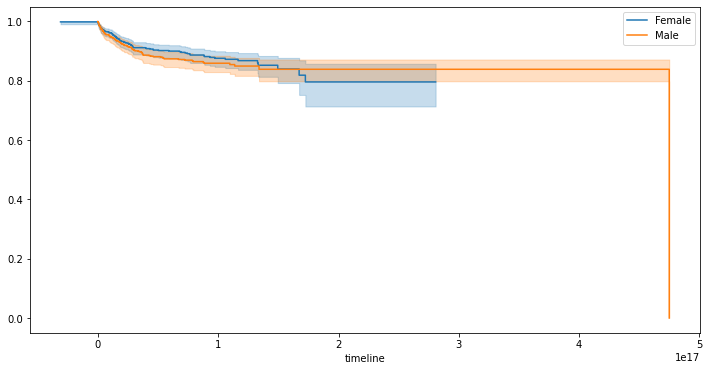

In [ ]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object
T = nc_lung_df['duration']     ## time to event
E = nc_lung_df['event']      ## event occurred or censored
## Two Cohorts are compared. 1. Streaming TV Not Subsribed by Users, 2. Streaming TV subscribed by the users.
groups = nc_lung_df['sex_Female']   
i1 = (groups == 1)      ## group i1 , having the pandas series for the 1st cohort
i2 = (groups == 0)     ## group i2 , having the pandas series for the 2nd cohort


## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Female')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Male')
kmf1.plot(ax=a1)

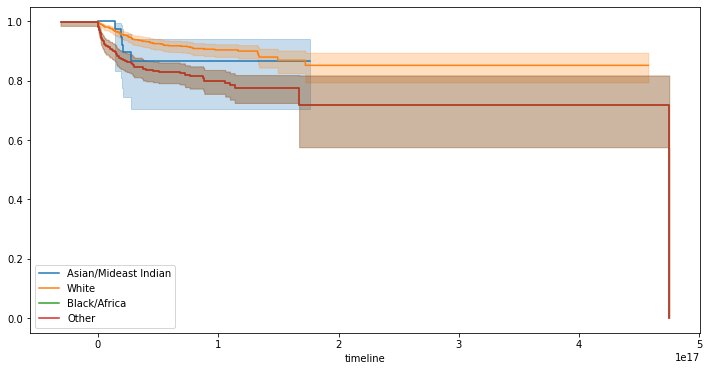

In [ ]:
kmf2 = KaplanMeierFitter() 
groups = nc_lung_df['race']   
i1 = (groups == 'A')      ## group i1 , having the pandas series for the 1st cohort
i2 = (groups == 'W')     ## group i2 , having the pandas series for the 2nd cohort
i3 = (groups == 'B')
i4 = (groups == 'O')

## fit the model for 1st cohort
kmf2.fit(T[i1], E[i1], label='Asian/Mideast Indian')   ## fit the cohort 1 data
ax = kmf2.plot()

kmf2.fit(T[i2], E[i2], label='White')         ## fit the cohort 2 data
ax1 = kmf2.plot(ax=ax)

kmf2.fit(T[i3], E[i3], label='Black/Africa')         ## fit the cohort 2 data
ax2 = kmf2.plot(ax=ax1)

kmf2.fit(T[i3], E[i3], label='Other')        ## fit the cohort 3 data
kmf2.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axis


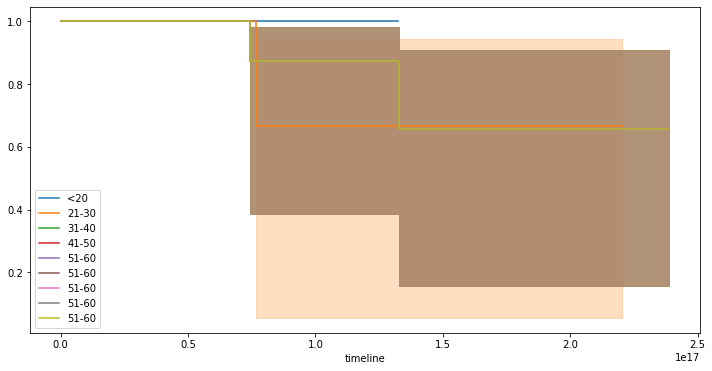

In [ ]:
kmf3 = KaplanMeierFitter() 
groups = nc_lung_df['lung_agegroup']   
i1 = (groups == '<20')      ## group i1 , having the pandas series for the 1st cohort
i2 = (groups == '21-30')     ## group i2 , having the pandas series for the 2nd cohort
i3 = (groups == '31-40')
i4 = (groups == '41-50')
i5 = (groups == '51-60')
i6 = (groups == '61-70')
i7 = (groups == '71-80')
i8 = (groups == '81-90')
i9 = (groups == '>90')


## fit the model for 1st cohort
kmf3.fit(T[i1], E[i1], label='<20')   ## fit the cohort 1 data
ax = kmf3.plot()

kmf3.fit(T[i2], E[i2], label='21-30')         ## fit the cohort 2 data
ax1 = kmf3.plot(ax=ax)

kmf3.fit(T[i3], E[i3], label='31-40')         ## fit the cohort 2 data
ax2 = kmf3.plot(ax=ax1)

kmf3.fit(T[i3], E[i3], label='41-50')        ## fit the cohort 3 data
ax3 = kmf3.plot(ax=ax2) 

kmf3.fit(T[i3], E[i3], label='51-60')        ## fit the cohort 3 data
ax4 = kmf3.plot(ax=ax3) 

kmf2.fit(T[i3], E[i3], label='61-70')        ## fit the cohort 3 data
ax5 = kmf3.plot(ax=ax4)
kmf2.fit(T[i3], E[i3], label='71-80')        ## fit the cohort 3 data
ax6 = kmf3.plot(ax=ax5)
kmf2.fit(T[i3], E[i3], label='81-90')        ## fit the cohort 3 data
ax7 = kmf3.plot(ax=ax6)
kmf2.fit(T[i3], E[i3], label='>90')        ## fit the cohort 3 data
kmf3.plot(ax=ax7) 


#Survival Analysis Graph


In [ ]:
import statsmodels.api as sm
data=nc_lung_df
df=data
#df = data.loc[data['sex_Female'] == 1, :]
sf = sm.SurvfuncRight(df["days"], df["event"])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sf.summary().head()
sf.quantile(0.25)
sf.quantile_ci(0.25)

(nan, nan)

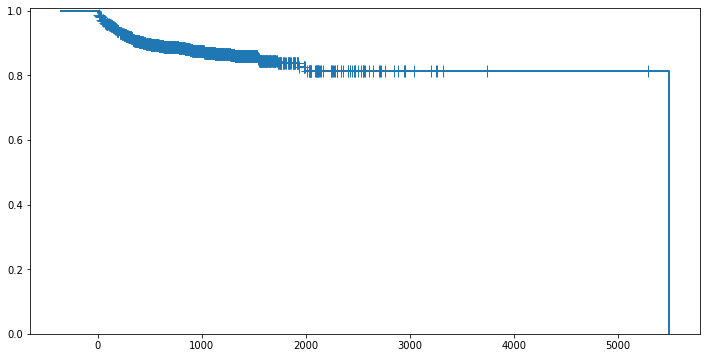

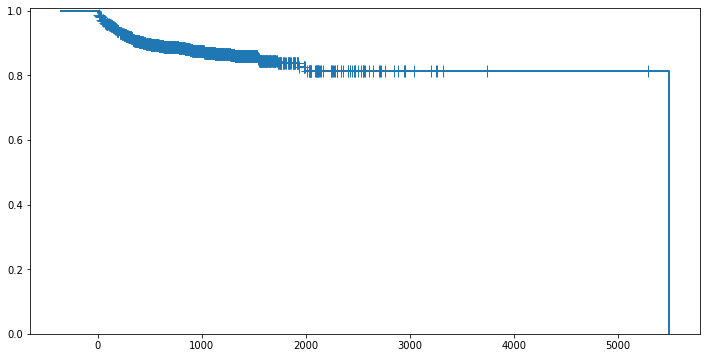

In [ ]:
sf.plot()

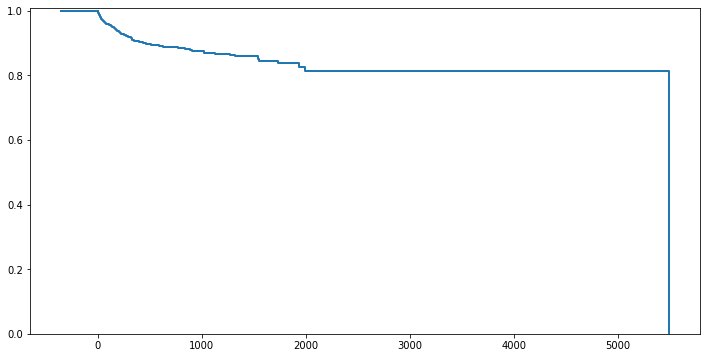

In [ ]:
fig = sf.plot()
ax = fig.get_axes()[0]
pt = ax.get_lines()[1]
pt.set_visible(False)

In [ ]:
'''
fig = sf.plot()
lcb, ucb = sf.simultaneous_cb()
ax = fig.get_axes()[0]
ax.fill_between(sf.surv_times, lcb, ucb, color='lightgrey')
ax.set_xlim(365, 365*10)
ax.set_ylim(0.7, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")
'''

'\nfig = sf.plot()\nlcb, ucb = sf.simultaneous_cb()\nax = fig.get_axes()[0]\nax.fill_between(sf.surv_times, lcb, ucb, color=\'lightgrey\')\nax.set_xlim(365, 365*10)\nax.set_ylim(0.7, 1)\nax.set_ylabel("Proportion alive")\nax.set_xlabel("Days since enrollment")\n'

Text(0.5, 0, 'Days since enrollment')

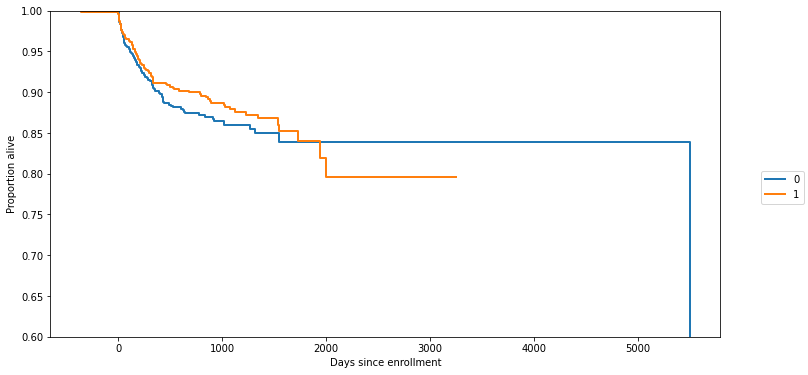

In [ ]:
gb = data.groupby("sex_Female")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
plt.figlegend((li[0], li[2]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

Text(0.5, 0, 'Days since enrollment')

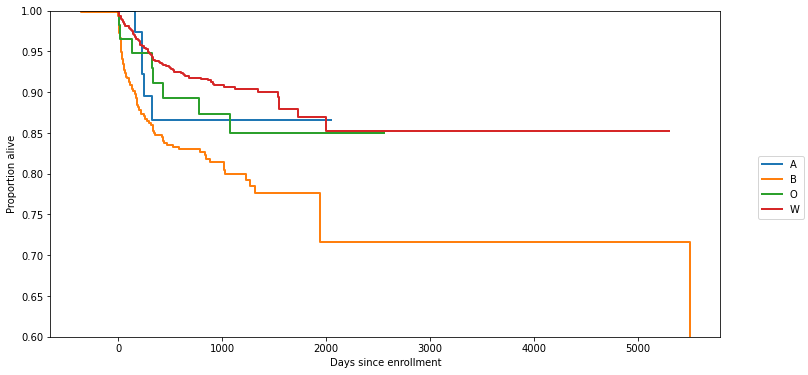

In [ ]:
gb = data.groupby("race")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
li[5].set_visible(False)
li[7].set_visible(False)
plt.figlegend((li[0], li[2],li[4],li[6]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

Text(0.5, 0, 'Days since enrollment')

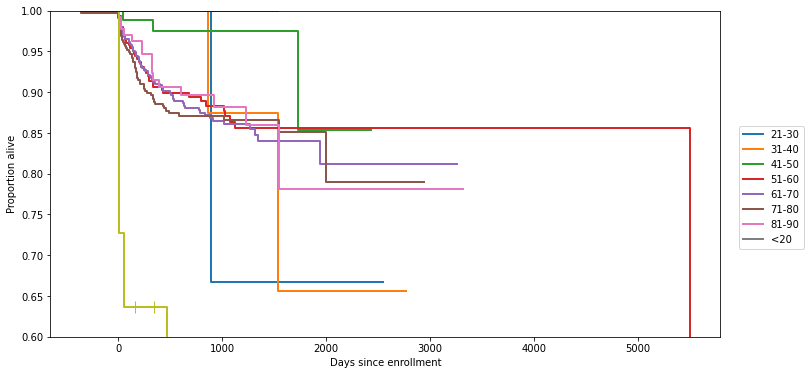

In [ ]:
gb = data.groupby("lung_agegroup")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
li[5].set_visible(False)
li[7].set_visible(False)
li[9].set_visible(False)
li[11].set_visible(False)
li[13].set_visible(False)
li[15].set_visible(False)
plt.figlegend((li[0], li[2],li[4],li[6],li[8], li[10],li[12],li[14]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

In [ ]:
stat, pv = sm.duration.survdiff(data['duration'], data['event'], data['sex_Female'])
print(stat)
print(pv)

0.7983839123044456
0.3715769928114988


In [ ]:
#------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


[Timedelta('41 days 00:00:00'), Timedelta('211 days 00:00:00'), Timedelta('1010 days 00:00:00'), Timedelta('40 days 00:00:00'), Timedelta('709 days 00:00:00'), Timedelta('458 days 00:00:00'), Timedelta('1316 days 00:00:00'), Timedelta('1353 days 00:00:00'), Timedelta('158 days 00:00:00'), Timedelta('592 days 00:00:00'), Timedelta('528 days 00:00:00'), Timedelta('4 days 00:00:00'), Timedelta('398 days 00:00:00'), Timedelta('1727 days 00:00:00'), Timedelta('28 days 00:00:00'), Timedelta('612 days 00:00:00'), Timedelta('457 days 00:00:00'), Timedelta('849 days 00:00:00'), Timedelta('1239 days 00:00:00'), Timedelta('1658 days 00:00:00'), Timedelta('1143 days 00:00:00'), Timedelta('993 days 00:00:00'), Timedelta('370 days 00:00:00'), Timedelta('211 days 00:00:00'), Timedelta('413 days 00:00:00'), Timedelta('638 days 00:00:00'), Timedelta('294 days 00:00:00'), Timedelta('95 days 00:00:00'), Timedelta('198 days 00:00:00'), Timedelta('624 days 00:00:00'), Timedelta('240 days 00:00:00'), Timede

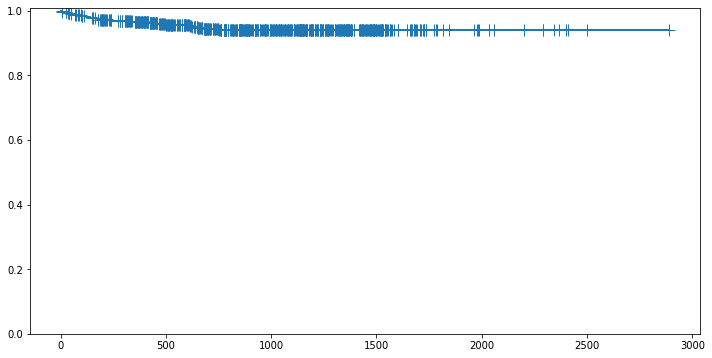

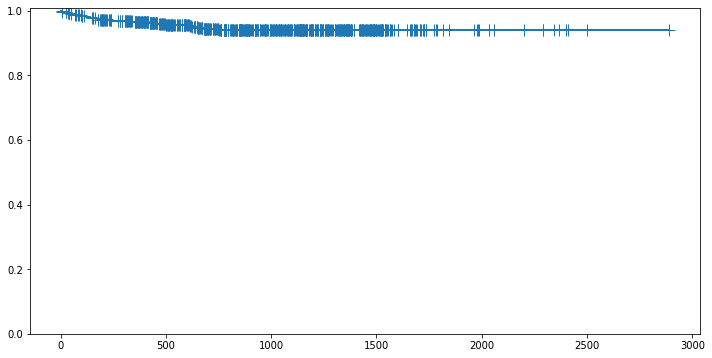

In [ ]:
nc_pancreas_df=pancreas_df[pancreas_df['died_after_date']==0]
def event(x):
  if x> pd.Timestamp(1800, 8, 25):
    return 1
  else:
    return 0
nc_pancreas_df['event']=nc_pancreas_df['DEATH_DATE_off'].map(lambda x:event(x))

tte=[]
for index, row in nc_pancreas_df.iterrows():
  if(not pd.isnull(row['DEATH_DATE_off'])):
    days=row['DEATH_DATE_off']-row['PANCREAS_DT']
  else:
    days=pd.Timestamp(2016, 8, 25)-row['PANCREAS_DT']
  tte.append(days)
print(tte)
df_tte=pd.DataFrame(tte)
nc_pancreas_df=nc_pancreas_df.reset_index()
nc_pancreas_df=pd.concat([nc_pancreas_df,df_tte],axis=1, join='inner')
nc_pancreas_df.columns = [*nc_pancreas_df.columns[:-1], 'duration']

#print(nc_lung_df['duration'].value_counts())
#print(type(nc_lung_df['duration'][0]))
nc_pancreas_df['duration_m'] = (nc_pancreas_df['duration'])/np.timedelta64(1, 'M')
nc_pancreas_df['duration_y'] = (nc_pancreas_df['duration'])/np.timedelta64(1, 'Y')
nc_pancreas_df['days']=nc_pancreas_df['duration'].dt.days.astype('int16')
nc_pancreas_df.head(10)
import statsmodels.api as sm
data=nc_pancreas_df
df=data
#df = data.loc[data['sex_Female'] == 1, :]
sf = sm.SurvfuncRight(df["days"], df["event"])
sf.summary().head()
sf.quantile(0.25)
sf.quantile_ci(0.25)
sf.plot()

Text(0.5, 0, 'Days since enrollment')

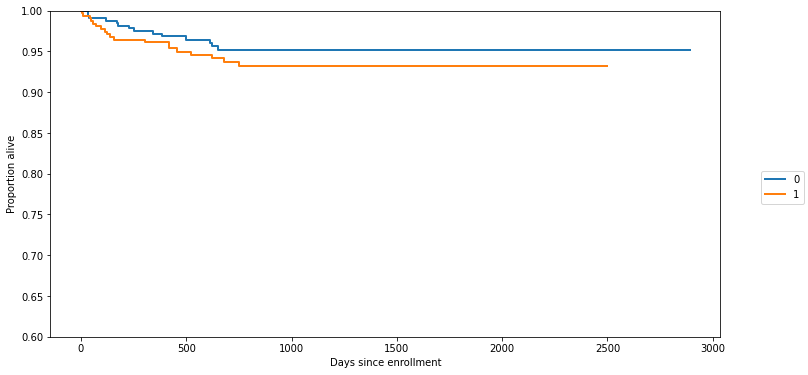

In [ ]:
gb = data.groupby("sex_Female")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
plt.figlegend((li[0], li[2]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

Text(0.5, 0, 'Days since enrollment')

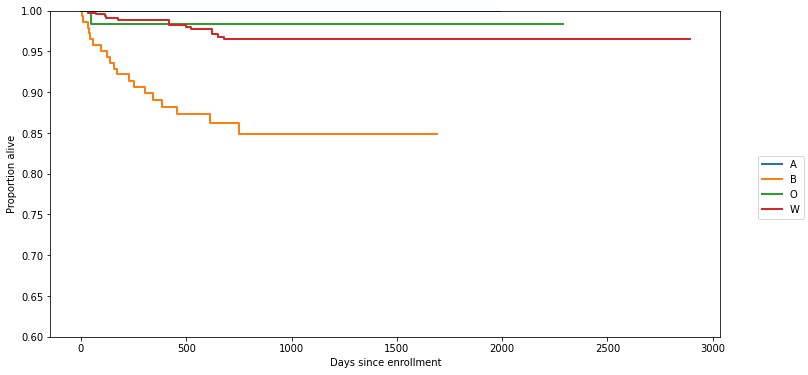

In [ ]:
gb = data.groupby("race")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
li[5].set_visible(False)
li[7].set_visible(False)
plt.figlegend((li[0], li[2],li[4],li[6]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

Text(0.5, 0, 'Days since enrollment')

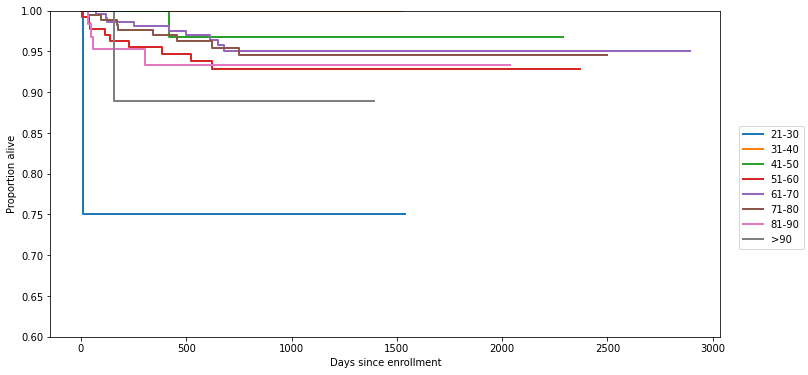

In [ ]:
gb = data.groupby("pancreas_agegroup")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
li[5].set_visible(False)
li[7].set_visible(False)
li[9].set_visible(False)
li[11].set_visible(False)
li[13].set_visible(False)
li[15].set_visible(False)
plt.figlegend((li[0], li[2],li[4],li[6],li[8], li[10],li[12],li[14]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

In [ ]:
stat, pv = sm.duration.survdiff(data['duration'], data['event'], data['sex_Female'])
print(stat)
print(pv)

1.044262156999628
0.30683227462835116


In [ ]:
#----------------------------------

[Timedelta('1365 days 00:00:00'), Timedelta('1523 days 00:00:00'), Timedelta('1453 days 00:00:00'), Timedelta('890 days 00:00:00'), Timedelta('1276 days 00:00:00'), Timedelta('109 days 00:00:00'), Timedelta('3116 days 00:00:00'), Timedelta('599 days 00:00:00'), Timedelta('974 days 00:00:00'), Timedelta('892 days 00:00:00'), Timedelta('884 days 00:00:00'), Timedelta('789 days 00:00:00'), Timedelta('602 days 00:00:00'), Timedelta('477 days 00:00:00'), Timedelta('1109 days 00:00:00'), Timedelta('154 days 00:00:00'), Timedelta('560 days 00:00:00'), Timedelta('849 days 00:00:00'), Timedelta('1443 days 00:00:00'), Timedelta('823 days 00:00:00'), Timedelta('570 days 00:00:00'), Timedelta('365 days 00:00:00'), Timedelta('868 days 00:00:00'), Timedelta('610 days 00:00:00'), Timedelta('7834 days 00:00:00'), Timedelta('951 days 00:00:00'), Timedelta('442 days 00:00:00'), Timedelta('338 days 00:00:00'), Timedelta('500 days 00:00:00'), Timedelta('479 days 00:00:00'), Timedelta('777 days 00:00:00'),

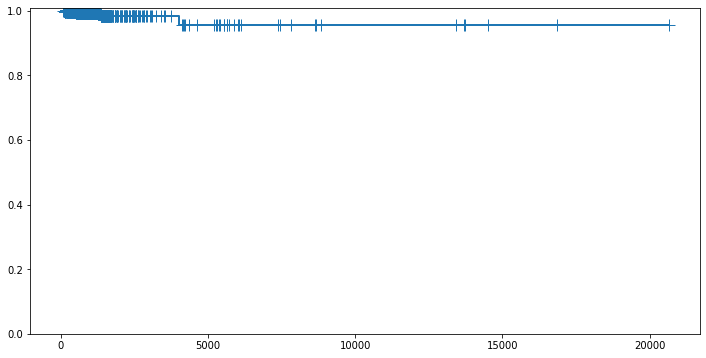

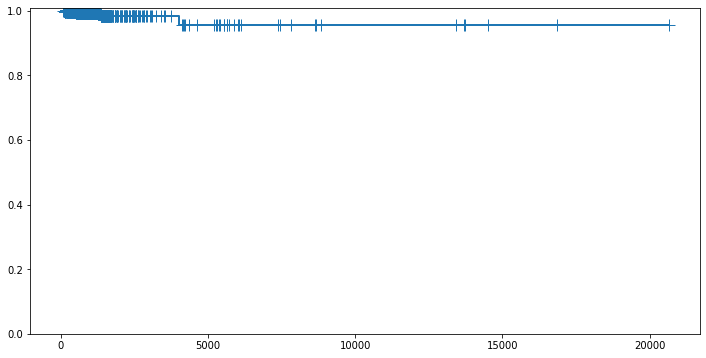

In [ ]:
nc_thyroid_df=thyroid_df[thyroid_df['died_after_date']==0]
def event(x):
  if x> pd.Timestamp(1800, 8, 25):
    return 1
  else:
    return 0
nc_thyroid_df['event']=nc_thyroid_df['DEATH_DATE_off'].map(lambda x:event(x))

tte=[]
for index, row in nc_thyroid_df.iterrows():
  if(not pd.isnull(row['DEATH_DATE_off'])):
    days=row['DEATH_DATE_off']-row['THYROID_DT']
  else:
    days=pd.Timestamp(2016, 8, 25)-row['THYROID_DT']
  tte.append(days)
print(tte)
df_tte=pd.DataFrame(tte)
nc_thyroid_df=nc_thyroid_df.reset_index()
nc_thyroid_df=pd.concat([nc_thyroid_df,df_tte],axis=1, join='inner')
nc_thyroid_df.columns = [*nc_thyroid_df.columns[:-1], 'duration']

#print(nc_lung_df['duration'].value_counts())
#print(type(nc_lung_df['duration'][0]))
nc_thyroid_df['duration_m'] = (nc_thyroid_df['duration'])/np.timedelta64(1, 'M')
nc_thyroid_df['duration_y'] = (nc_thyroid_df['duration'])/np.timedelta64(1, 'Y')
nc_thyroid_df['days']=nc_thyroid_df['duration'].dt.days.astype('int16')
nc_thyroid_df.head(10)
import statsmodels.api as sm
data=nc_thyroid_df
df=data
#df = data.loc[data['sex_Female'] == 1, :]
sf = sm.SurvfuncRight(df["days"], df["event"])
sf.summary().head()
sf.quantile(0.25)
sf.quantile_ci(0.25)
sf.plot()

Text(0.5, 0, 'Days since enrollment')

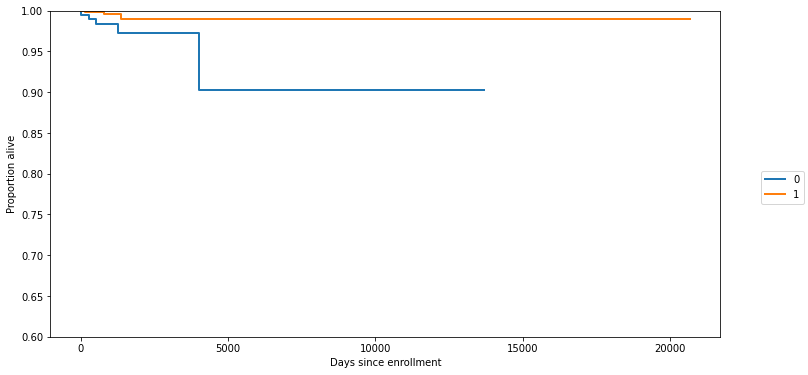

In [ ]:
gb = data.groupby("sex_Female")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
plt.figlegend((li[0], li[2]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

Text(0.5, 0, 'Days since enrollment')

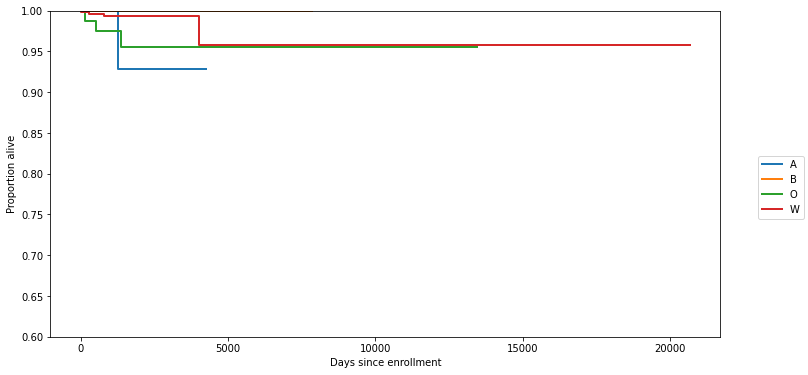

In [ ]:
gb = data.groupby("race")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
li[5].set_visible(False)
li[7].set_visible(False)
plt.figlegend((li[0], li[2],li[4],li[6]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

Text(0.5, 0, 'Days since enrollment')

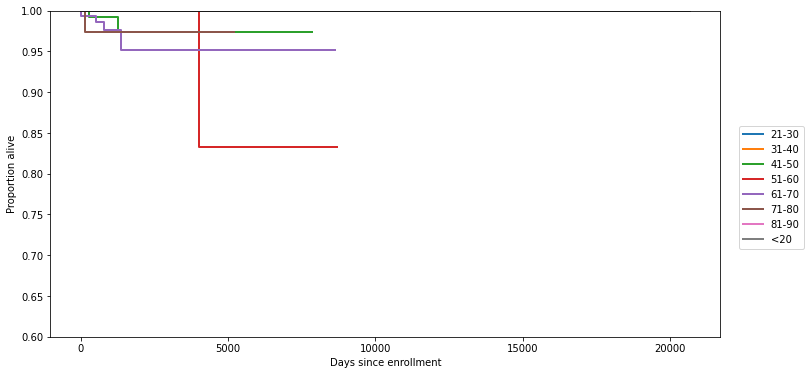

In [ ]:
gb = data.groupby("thyroid_agegroup")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
li[5].set_visible(False)
li[7].set_visible(False)
li[9].set_visible(False)
li[11].set_visible(False)
li[13].set_visible(False)
li[15].set_visible(False)
plt.figlegend((li[0], li[2],li[4],li[6],li[8], li[10],li[12],li[14]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

In [ ]:
stat, pv = sm.duration.survdiff(data['days'], data['event'], data['sex_Female'])
print(stat)
print(pv)

4.22582904621149
0.03981316488044628


In [ ]:
#-----------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


[Timedelta('967 days 00:00:00'), Timedelta('464 days 00:00:00'), Timedelta('1076 days 00:00:00'), Timedelta('990 days 00:00:00'), Timedelta('988 days 00:00:00'), Timedelta('1333 days 00:00:00'), Timedelta('624 days 00:00:00'), Timedelta('323 days 00:00:00'), Timedelta('675 days 00:00:00'), Timedelta('1010 days 00:00:00'), Timedelta('1653 days 00:00:00'), Timedelta('1664 days 00:00:00'), Timedelta('1209 days 00:00:00'), Timedelta('444 days 00:00:00'), Timedelta('1385 days 00:00:00'), Timedelta('948 days 00:00:00'), Timedelta('530 days 00:00:00'), Timedelta('1551 days 00:00:00'), Timedelta('1034 days 00:00:00'), Timedelta('1319 days 00:00:00'), Timedelta('0 days 00:00:00'), Timedelta('1408 days 00:00:00'), Timedelta('1671 days 00:00:00'), Timedelta('1223 days 00:00:00'), Timedelta('5075 days 00:00:00'), Timedelta('1498 days 00:00:00'), Timedelta('447 days 00:00:00'), Timedelta('462 days 00:00:00'), Timedelta('900 days 00:00:00'), Timedelta('1079 days 00:00:00'), Timedelta('2522 days 00:0

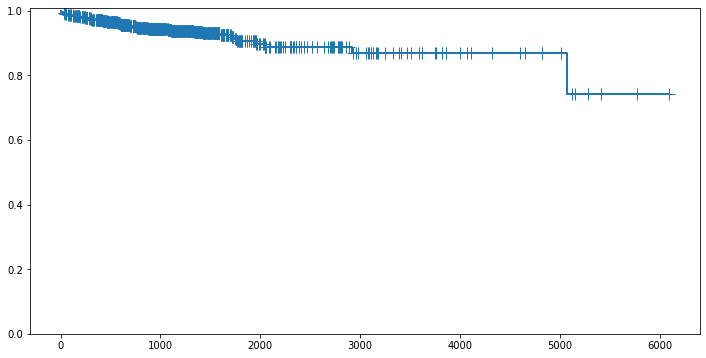

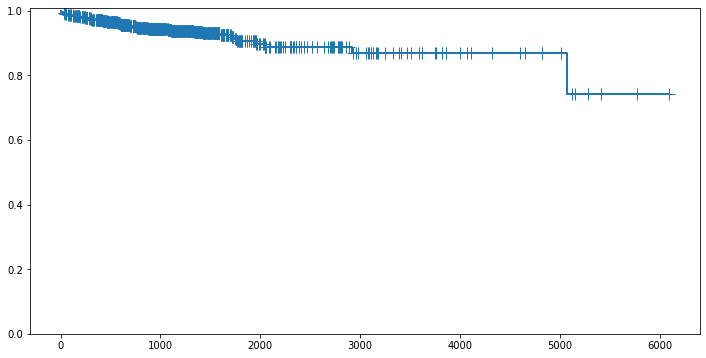

In [ ]:
nc_colorectal_df=colorectal_df[colorectal_df['died_after_date']==0]
def event(x):
  if x> pd.Timestamp(1800, 8, 25):
    return 1
  else:
    return 0
nc_colorectal_df['event']=nc_colorectal_df['DEATH_DATE_off'].map(lambda x:event(x))

tte=[]
for index, row in nc_colorectal_df.iterrows():
  if(not pd.isnull(row['DEATH_DATE_off'])):
    days=row['DEATH_DATE_off']-row['COLORECTAL_DT']
  else:
    days=pd.Timestamp(2016, 8, 25)-row['COLORECTAL_DT']
  tte.append(days)
print(tte)
df_tte=pd.DataFrame(tte)
nc_colorectal_df=nc_colorectal_df.reset_index()
nc_colorectal_df=pd.concat([nc_colorectal_df,df_tte],axis=1, join='inner')
nc_colorectal_df.columns = [*nc_colorectal_df.columns[:-1], 'duration']

#print(nc_lung_df['duration'].value_counts())
#print(type(nc_lung_df['duration'][0]))
nc_colorectal_df['duration_m'] = (nc_colorectal_df['duration'])/np.timedelta64(1, 'M')
nc_colorectal_df['duration_y'] = (nc_colorectal_df['duration'])/np.timedelta64(1, 'Y')
nc_colorectal_df['days']=nc_colorectal_df['duration'].dt.days.astype('int16')
nc_colorectal_df.head(10)
import statsmodels.api as sm
data=nc_colorectal_df
df=data
#df = data.loc[data['sex_Female'] == 1, :]
sf = sm.SurvfuncRight(df["days"], df["event"])
sf.summary().head()
sf.quantile(0.25)
sf.quantile_ci(0.25)
sf.plot()

Text(0.5, 0, 'Days since enrollment')

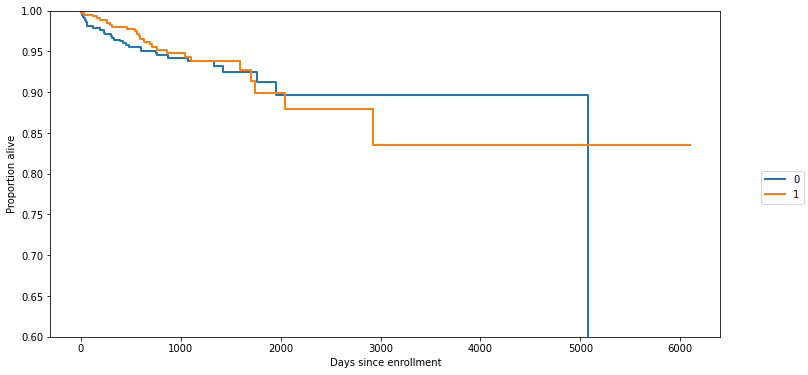

In [ ]:
gb = data.groupby("sex_Female")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
plt.figlegend((li[0], li[2]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

Text(0.5, 0, 'Days since enrollment')

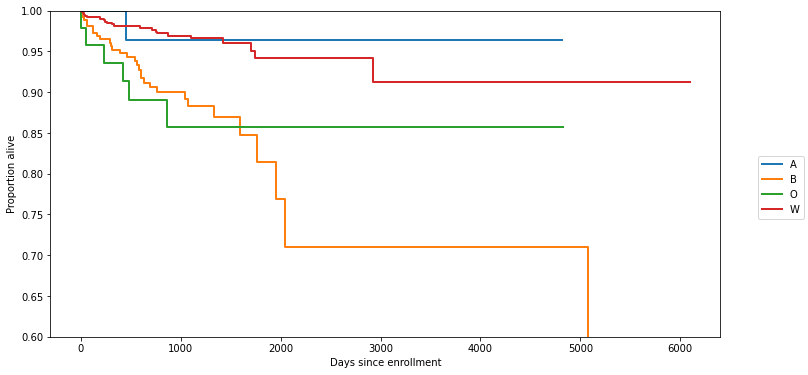

In [ ]:
gb = data.groupby("race")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
li[5].set_visible(False)
li[7].set_visible(False)
plt.figlegend((li[0], li[2],li[4],li[6]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

Text(0.5, 0, 'Days since enrollment')

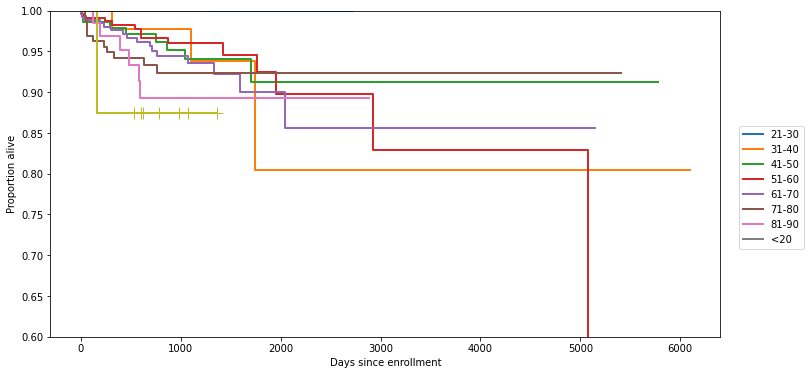

In [ ]:
gb = data.groupby("colorectal_agegroup")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
li[5].set_visible(False)
li[7].set_visible(False)
li[9].set_visible(False)
li[11].set_visible(False)
li[13].set_visible(False)
li[15].set_visible(False)
plt.figlegend((li[0], li[2],li[4],li[6],li[8], li[10],li[12],li[14]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

In [ ]:
stat, pv = sm.duration.survdiff(data['days'], data['event'], data['sex_Female'])
print(stat)
print(pv)

0.1395756859336725
0.708703202722228


In [ ]:
#----------------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


[Timedelta('541 days 00:00:00'), Timedelta('707 days 00:00:00'), Timedelta('817 days 00:00:00'), Timedelta('1194 days 00:00:00'), Timedelta('535 days 00:00:00'), Timedelta('1390 days 00:00:00'), Timedelta('1272 days 00:00:00'), Timedelta('1690 days 00:00:00'), Timedelta('1436 days 00:00:00'), Timedelta('774 days 00:00:00'), Timedelta('757 days 00:00:00'), Timedelta('986 days 00:00:00'), Timedelta('564 days 00:00:00'), Timedelta('1340 days 00:00:00'), Timedelta('1491 days 00:00:00'), Timedelta('1105 days 00:00:00'), Timedelta('883 days 00:00:00'), Timedelta('1061 days 00:00:00'), Timedelta('756 days 00:00:00'), Timedelta('428 days 00:00:00'), Timedelta('1027 days 00:00:00'), Timedelta('1428 days 00:00:00'), Timedelta('587 days 00:00:00'), Timedelta('29 days 00:00:00'), Timedelta('528 days 00:00:00'), Timedelta('642 days 00:00:00'), Timedelta('1514 days 00:00:00'), Timedelta('1530 days 00:00:00'), Timedelta('218 days 00:00:00'), Timedelta('2166 days 00:00:00'), Timedelta('1258 days 00:00

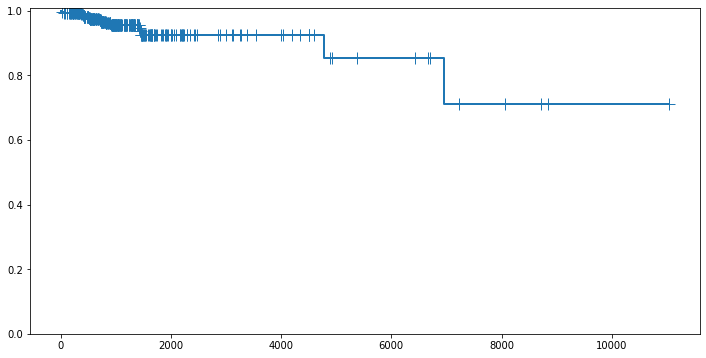

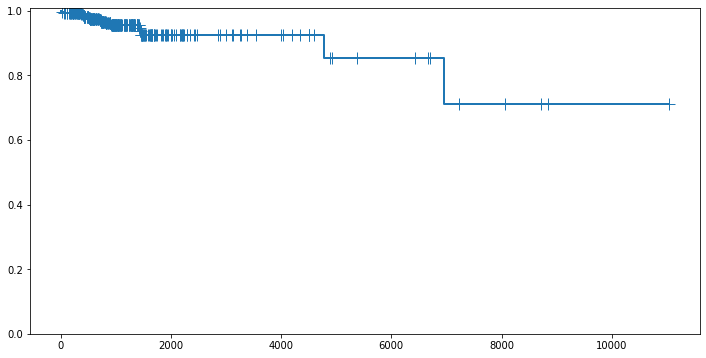

In [ ]:
nc_melanoma_df=melanoma_df[melanoma_df['died_after_date']==0]
def event(x):
  if x> pd.Timestamp(1800, 8, 25):
    return 1
  else:
    return 0
nc_melanoma_df['event']=nc_melanoma_df['DEATH_DATE_off'].map(lambda x:event(x))

tte=[]
for index, row in nc_melanoma_df.iterrows():
  if(not pd.isnull(row['DEATH_DATE_off'])):
    days=row['DEATH_DATE_off']-row['MELANOMA_DT']
  else:
    days=pd.Timestamp(2016, 8, 25)-row['MELANOMA_DT']
  tte.append(days)
print(tte)
df_tte=pd.DataFrame(tte)
nc_melanoma_df=nc_melanoma_df.reset_index()
nc_melanoma_df=pd.concat([nc_melanoma_df,df_tte],axis=1, join='inner')
nc_melanoma_df.columns = [*nc_melanoma_df.columns[:-1], 'duration']

#print(nc_lung_df['duration'].value_counts())
#print(type(nc_lung_df['duration'][0]))
nc_melanoma_df['duration_m'] = (nc_melanoma_df['duration'])/np.timedelta64(1, 'M')
nc_melanoma_df['duration_y'] = (nc_melanoma_df['duration'])/np.timedelta64(1, 'Y')
nc_melanoma_df['days']=nc_melanoma_df['duration'].dt.days.astype('int16')
nc_melanoma_df.head(10)
import statsmodels.api as sm
data=nc_melanoma_df
df=data
#df = data.loc[data['sex_Female'] == 1, :]
sf = sm.SurvfuncRight(df["days"], df["event"])
sf.summary().head()
sf.quantile(0.25)
sf.quantile_ci(0.25)
sf.plot()

Text(0.5, 0, 'Days since enrollment')

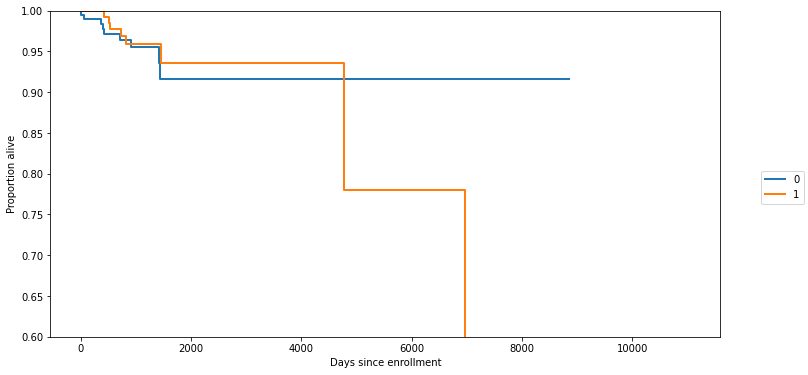

In [ ]:
gb = data.groupby("sex_Female")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
plt.figlegend((li[0], li[2]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

Text(0.5, 0, 'Days since enrollment')

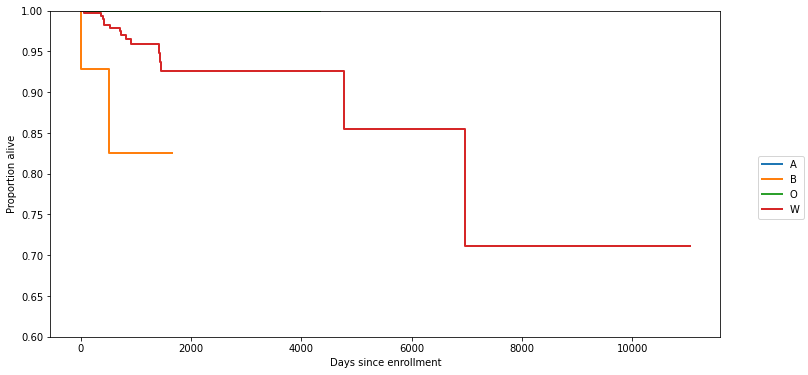

In [ ]:
gb = data.groupby("race")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
li[5].set_visible(False)
li[7].set_visible(False)
plt.figlegend((li[0], li[2],li[4],li[6]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

Text(0.5, 0, 'Days since enrollment')

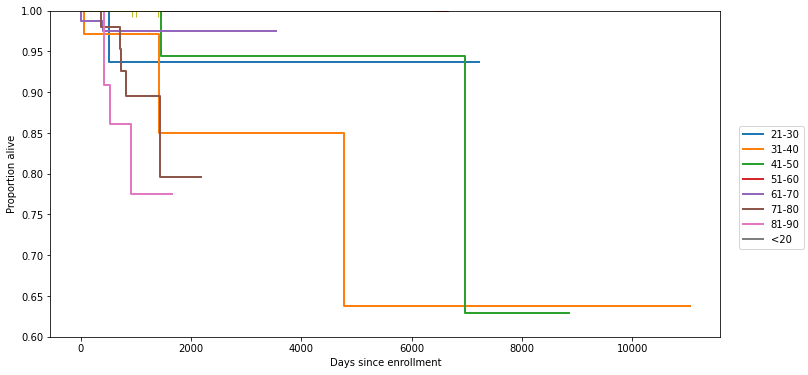

In [ ]:
gb = data.groupby("melanoma_agegroup")
ax = plt.axes()
sexes = []
for g in gb:
    sexes.append(g[0])
    sf = sm.SurvfuncRight(g[1]["days"], g[1]["event"])
    sf.plot(ax)
li = ax.get_lines()
li[1].set_visible(False)
li[3].set_visible(False)
li[5].set_visible(False)
li[7].set_visible(False)
li[9].set_visible(False)
li[11].set_visible(False)
li[13].set_visible(False)
li[15].set_visible(False)
plt.figlegend((li[0], li[2],li[4],li[6],li[8], li[10],li[12],li[14]), sexes, "center right")
plt.ylim(0.6, 1)
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Days since enrollment")

In [ ]:
stat, pv = sm.duration.survdiff(data['days'], data['event'], data['sex_Female'])
print(stat)
print(pv)

0.0024986498775895613
0.9601331487410255


In [ ]:
#------------------------------------

In [ ]:
from lifelines import CoxPHFitter  

In [ ]:
df_lung_a= nc_lung_df.loc[:,['died_after_date','sex_Female','sex_Male','race','lung_age','event','lung_agegroup','days']]
df_lung_a.head() 

,died_after_date,sex_Female,sex_Male,race,lung_age,event,lung_agegroup,days
0,0,0,1,B,54,0,51-60,1089
1,0,0,1,B,61,1,61-70,18
2,0,1,0,B,69,1,61-70,44
3,0,0,1,B,55,0,51-60,1365
4,0,0,1,B,73,0,71-80,1192


In [ ]:
df_lung_a = pd.get_dummies(df_lung_a, drop_first=True)

print(type(df_lung_a['days'][0]))
df_lung_a.info()

<class 'numpy.int16'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   died_after_date      1471 non-null   int64
 1   sex_Female           1471 non-null   uint8
 2   sex_Male             1471 non-null   uint8
 3   lung_age             1471 non-null   int64
 4   event                1471 non-null   int64
 5   days                 1471 non-null   int16
 6   race_B               1471 non-null   uint8
 7   race_O               1471 non-null   uint8
 8   race_W               1471 non-null   uint8
 9   lung_agegroup_31-40  1471 non-null   uint8
 10  lung_agegroup_41-50  1471 non-null   uint8
 11  lung_agegroup_51-60  1471 non-null   uint8
 12  lung_agegroup_61-70  1471 non-null   uint8
 13  lung_agegroup_71-80  1471 non-null   uint8
 14  lung_agegroup_81-90  1471 non-null   uint8
 15  lung_agegroup_<20    1471 non-null   uint8
 16  lu

In [ ]:
'''
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

cph = CoxPHFitter()
cph.fit(df_lung_a, duration_col='days', event_col='event')

cph.print_summary()
'''

"\nfrom lifelines import CoxPHFitter\nfrom lifelines.datasets import load_rossi\n\ncph = CoxPHFitter()\ncph.fit(df_lung_a, duration_col='days', event_col='event')\n\ncph.print_summary()\n"

#Survival Analysis Questions


In [ ]:
#--------------Survivla Anlysis
#lung
#pancreas
#thyroid
#colorectal
#melanoma


In [ ]:
#Q1 #Q2
nc_lung_df.head()
#sum(nc_lung_df['event'])
#len(nc_lung_df.index)
lung_rate=sum(nc_lung_df['event']==0)/len(nc_lung_df.index)
print(lung_rate)
pancreas_rate=sum(nc_pancreas_df['event']==0)/len(nc_pancreas_df.index)
print(pancreas_rate)
thyroid_rate=sum(nc_thyroid_df['event']==0)/len(nc_thyroid_df.index)
print(thyroid_rate)
colorectal_rate=sum(nc_colorectal_df['event']==0)/len(nc_colorectal_df.index)
print(colorectal_rate)
melanoma_rate=sum(nc_melanoma_df['event']==0)/len(nc_melanoma_df.index)
print(melanoma_rate)

0.8749150237933379
0.9489953632148377
0.9892328398384926
0.9382978723404255
0.9507246376811594


In [ ]:
#Q4 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#combine to calculate

In [ ]:
#Q4
age_list=['<20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','>90']
lung4=nc_lung_df[nc_lung_df['days']>400]
result=[]
for i in range(len(age_list)):
  lung41=lung4[lung4['lung_agegroup']==age_list[i]]
  nomi=sum(lung41['event']==0)
  deno=len(lung41.index)
  rate=nomi/deno
  result.append(rate)
result
# >90

[1.0,
 0.8333333333333334,
 0.8666666666666667,
 0.9864864864864865,
 0.9588477366255144,
 0.9478908188585607,
 0.9747634069400631,
 0.9629629629629629,
 0.8]

In [ ]:
pancreas4=nc_pancreas_df[nc_pancreas_df['days']>400]
result=[]
for i in range(len(age_list)):
  pancreas41=pancreas4[pancreas4['pancreas_agegroup']==age_list[i]]
  nomi=sum(pancreas41['event']==0)
  deno=len(pancreas41.index)
  rate=nomi/deno
  result.append(rate)
result
#41-50

[nan,
 1.0,
 1.0,
 0.967741935483871,
 0.9826086956521739,
 0.9731182795698925,
 0.9788732394366197,
 1.0,
 1.0]

In [ ]:
thyroid4=nc_thyroid_df[nc_thyroid_df['days']>400]
result=[]
for i in range(len(age_list)):
  thyroid41=thyroid4[thyroid4['thyroid_agegroup']==age_list[i]]
  nomi=sum(thyroid41['event']==0)
  deno=len(thyroid41.index)
  rate=nomi/deno
  result.append(rate)
result
#61-70

[1.0,
 1.0,
 1.0,
 0.9918032786885246,
 0.9931506849315068,
 0.9791666666666666,
 1.0,
 1.0,
 nan]

In [ ]:
colorectal4=nc_colorectal_df[nc_colorectal_df['days']>400]
result=[]
for i in range(len(age_list)):
  colorectal41=colorectal4[colorectal4['colorectal_agegroup']==age_list[i]]
  nomi=sum(colorectal41['event']==0)
  deno=len(colorectal41.index)
  rate=nomi/deno
  result.append(rate)
result
#31-40

[1.0,
 1.0,
 0.9523809523809523,
 0.9615384615384616,
 0.9569377990430622,
 0.9555555555555556,
 0.9848484848484849,
 0.9454545454545454,
 1.0]

In [ ]:
melanomal4=nc_melanoma_df[nc_melanoma_df['days']>400]
result=[]
for i in range(len(age_list)):
  melanomal41=melanomal4[melanomal4['melanoma_agegroup']==age_list[i]]
  nomi=sum(melanomal41['event']==0)
  deno=len(melanomal41.index)
  rate=nomi/deno
  result.append(rate)
result
#81-90

[1.0,
 0.9375,
 0.9333333333333333,
 0.9555555555555556,
 1.0,
 1.0,
 0.92,
 0.8181818181818182,
 1.0]

In [ ]:
#Q5
colorectal5=nc_colorectal_df[nc_colorectal_df['sex_Female']==1]
colorectal52=colorectal5[colorectal5['days']<1000]
nomi=sum(colorectal52['event']==1)
deno=len(colorectal5.index)
rate=(deno-nomi)/deno
rate

0.9570405727923628

In [ ]:
#Q6
lung6=nc_lung_df[nc_lung_df['sex_Female']==0]
lung62=lung6[lung6['days']<300]
nomi=sum(lung62['event']==1)
deno=len(lung6.index)
rate=(deno-nomi)/deno
rate

0.916083916083916

In [ ]:
#Q7
melanoma7=nc_melanoma_df[nc_melanoma_df['sex_Female']==1]
melanoma72=melanoma7[melanoma7['days']<1200]
nomi=sum(melanoma72['event']==1)
deno=len(melanoma7.index)
rate=(deno-nomi)/deno
rate

0.96875

In [ ]:
#Q8
thyroid8=nc_thyroid_df[nc_thyroid_df['sex_Female']==0]
thyroid82=thyroid8[thyroid8['days']<1500]
nomi=sum(thyroid82['event']==1)
deno=len(thyroid8.index)
rate=(deno-nomi)/deno
rate

0.9804878048780488

In [ ]:
#Q9
pancreatic9=nc_pancreas_df[nc_pancreas_df['sex_Female']==0]
pancreatic92=pancreatic9[pancreatic9['days']<2200]
nomi=sum(pancreatic92['event']==1)
deno=len(pancreatic9.index)
rate=(deno-nomi)/deno
rate

0.9578313253012049

In [ ]:
#Q10
colorectal1=nc_colorectal_df[nc_colorectal_df['race']=='A']
colorectal11=colorectal1[colorectal1['days']<2000]
nomi=sum(colorectal11['event']==1)
deno=len(colorectal1.index)
rate=(deno-nomi)/deno
rate

0.9655172413793104

In [ ]:
#Q11
lung11=nc_colorectal_df[nc_colorectal_df['race']=='W']
lung12=lung11[lung11['days']<1000]
nomi=sum(lung12['event']==1)
deno=len(lung11.index)
rate=(deno-nomi)/deno
rate

0.9735537190082645

In [ ]:
#Q12
melanoma12=nc_melanoma_df[nc_melanoma_df['race']=='A']
melanoma13=melanoma12[melanoma12['days']<730]
nomi=sum(melanoma13['event']==1)
deno=len(melanoma12.index)
rate=(deno-nomi)/deno
rate

1.0

In [ ]:
#Q13
pancreatic12=nc_pancreas_df[nc_pancreas_df['race']=='W']
pancreatic13=pancreatic12[pancreatic12['days']<1095]
nomi=sum(pancreatic13['event']==1)
deno=len(pancreatic12.index)
rate=(deno-nomi)/deno
rate

0.9701149425287356

In [ ]:
#Q14
thyroid12=nc_thyroid_df[nc_thyroid_df['race']=='A']
thyroid13=thyroid12[thyroid12['days']<1500]
nomi=sum(thyroid13['event']==1)
deno=len(thyroid12.index)
rate=(deno-nomi)/deno
rate

0.972972972972973

In [ ]:
#Q15
age_list=['<20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','>90']
colorectal4=nc_colorectal_df
result=[]
for i in range(len(age_list)):
  colorectal41=colorectal4[colorectal4['colorectal_agegroup']==age_list[i]]
  nomi=sum(colorectal41['event']==0)
  deno=len(colorectal41.index)
  rate=nomi/deno
  result.append(rate)
result

[1.0,
 1.0,
 0.9387755102040817,
 0.9444444444444444,
 0.9449152542372882,
 0.9377431906614786,
 0.9320987654320988,
 0.9130434782608695,
 0.875]

In [ ]:
#Q16
age_list=['<20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','>90']
lung4=nc_lung_df
result=[]
for i in range(len(age_list)):
  lung41=lung4[lung4['lung_agegroup']==age_list[i]]
  nomi=sum(lung41['event']==0)
  deno=len(lung41.index)
  rate=nomi/deno
  result.append(rate)
result

[1.0,
 0.8571428571428571,
 0.8666666666666667,
 0.9642857142857143,
 0.8758169934640523,
 0.868421052631579,
 0.8698795180722891,
 0.8814814814814815,
 0.5454545454545454]

In [ ]:
#Q17
melanoma12=nc_melanoma_df[nc_melanoma_df['melanoma_agegroup']=='61-70']
melanoma13=melanoma12[melanoma12['days']<1825]
nomi=sum(melanoma13['event']==1)
deno=len(melanoma12.index)
rate=(deno-nomi)/deno
rate

0.975609756097561

In [ ]:
#Q18
pancreatic12=nc_pancreas_df[nc_pancreas_df['pancreas_agegroup']=='21-30']
pancreatic13=pancreatic12[pancreatic12['days']<365]
nomi=sum(pancreatic13['event']==1)
deno=len(pancreatic12.index)
rate=(deno-nomi)/deno
rate

0.75

In [ ]:
#Q19
thyroid12=nc_thyroid_df[nc_thyroid_df['thyroid_agegroup']=='51-60']
thyroid13=thyroid12[thyroid12['days']<2200]
nomi=sum(thyroid13['event']==1)
deno=len(thyroid12.index)
rate=(deno-nomi)/deno
rate

1.0

In [ ]:
#Q20
race_list=['A','O','W',"B"]
def event(x):
  if x> pd.Timestamp(1800, 8, 25):
    return 1
  else:
    return 0

df11['event']=df11['DEATH_DATE_off'].map(lambda x:event(x))
nc_df11=df11[df11['died_after_date']==0]
result=[]
for i in range(len(race_list)):
  df11_a=nc_df11[nc_df11['race']==race_list[i]]
  nomi=sum(df11_a['event']==0)
  deno=len(df11_a.index)
  rate=nomi/deno
  result.append(rate)
result
#white

[0.9396551724137931, 0.9346153846153846, 0.9520572450805009, 0.853220696937698]

In [ ]:
#Q4
cancer_age=[]
for index, row in nc_df11.iterrows():
  if(not pd.isnull(row['date1'])):
    year=row['date1'].year-row['BIRTH_DATE_off'].year
  else:
    year=0
  cancer_age.append(year)
df_cancer_age=pd.DataFrame(cancer_age)
df_cancer_age.columns = [*df_cancer_age.columns[:-1], 'cancer_age']
#nc_df11.reset_index()
nc_df11 = pd.concat([nc_df11, df_cancer_age], axis=1,join='inner')
nc_df11['cancer_age'].value_counts()

67    136
63    131
66    128
68    128
65    127
     ... 
4       1
7       1
9       1
1       1
10      1
Name: cancer_age, Length: 94, dtype: int64

In [ ]:

def agegroup(x):
  if x<21:
    return '<20'
  if 20<x<31:
    return '21-30'
  if 30<x<41:
    return '31-40'
  if 40<x<51:
    return '41-50'
  if 50<x<61:
    return '51-60'
  if 60<x<71:
    return '61-70'
  if 70<x<81:
    return '71-80'
  if 80<x<91:
    return '81-90'
  if x>90:
    return '>90'
nc_df11['agegroup']=nc_df11['cancer_age'].map(lambda x:agegroup(x))
nc_df11

,level_0,index,BIRTH_DATE_off,DEATH_DATE_off,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Count,date1,date2,year1,year2,sex_Female,sex_Male,lung_age,pancreas_age,thyroid_age,colorectal_age,melanoma_age,died_after_date,event,cancer_age,agegroup
0,0,0,1959-12-02,NaT,B,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,4,2013-09-01,NaT,54,100,0,1,54,0,0,0,0,0,0,54,51-60
1,1,1,1955-11-18,2016-04-20,B,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,4,2016-04-02,NaT,61,100,0,1,61,0,0,0,0,0,1,61,61-70
2,2,2,1946-01-14,2015-05-25,B,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,4,2015-04-11,NaT,69,100,1,0,69,0,0,0,0,0,1,69,61-70
3,3,6,1946-11-03,NaT,B,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,4,2012-11-29,NaT,66,100,1,0,0,0,66,0,0,0,0,66,61-70
4,4,7,1938-06-10,NaT,B,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,4,2012-06-24,NaT,74,100,1,0,0,0,74,0,0,0,0,74,71-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4113,4113,8357,1953-11-27,NaT,W,0,0,0,1,0,NaT,NaT,NaT,2015-11-11,NaT,4,2015-11-11,NaT,62,100,1,0,0,0,0,62,0,0,0,62,61-70
4114,4114,8360,1944-08-23,NaT,B,0,0,0,1,0,NaT,NaT,NaT,2016-03-12,NaT,4,2016-03-12,NaT,72,100,1,0,0,0,0,72,0,0,0,38,31-40
4115,4115,8361,1946-09-18,NaT,W,0,1,0,0,0,NaT,2008-09-26,NaT,NaT,NaT,4,2008-09-26,NaT,62,100,0,1,0,62,0,0,0,0,0,67,61-70
4116,4116,8362,1941-12-15,NaT,W,1,0,0,0,0,2015-05-21,NaT,NaT,NaT,NaT,4,2015-05-21,NaT,74,100,1,0,74,0,0,0,0,0,0,58,51-60


In [ ]:
tte=[]
for index, row in nc_df11.iterrows():
  if(not pd.isnull(row['DEATH_DATE_off'])):
    days=row['DEATH_DATE_off']-row['date1']
  else:
    days=pd.Timestamp(2016, 8, 25)-row['date1']
  tte.append(days)
print(tte)
df_tte=pd.DataFrame(tte)
#nc_df11=nc_df11.reset_index()
nc_df11=pd.concat([nc_df11,df_tte],axis=1, join='inner')
nc_df11.columns = [*nc_df11.columns[:-1], 'duration']

nc_df11['days']=nc_df11['duration'].dt.days.astype('int16')
nc_df11

[Timedelta('1089 days 00:00:00'), Timedelta('18 days 00:00:00'), Timedelta('44 days 00:00:00'), Timedelta('1365 days 00:00:00'), Timedelta('1523 days 00:00:00'), Timedelta('1365 days 00:00:00'), Timedelta('1192 days 00:00:00'), Timedelta('967 days 00:00:00'), Timedelta('464 days 00:00:00'), Timedelta('4 days 00:00:00'), Timedelta('1076 days 00:00:00'), Timedelta('65 days 00:00:00'), Timedelta('589 days 00:00:00'), Timedelta('278 days 00:00:00'), Timedelta('780 days 00:00:00'), Timedelta('1453 days 00:00:00'), Timedelta('668 days 00:00:00'), Timedelta('1024 days 00:00:00'), Timedelta('890 days 00:00:00'), Timedelta('990 days 00:00:00'), Timedelta('268 days 00:00:00'), Timedelta('986 days 00:00:00'), Timedelta('1646 days 00:00:00'), Timedelta('1074 days 00:00:00'), Timedelta('41 days 00:00:00'), Timedelta('1333 days 00:00:00'), Timedelta('624 days 00:00:00'), Timedelta('697 days 00:00:00'), Timedelta('832 days 00:00:00'), Timedelta('323 days 00:00:00'), Timedelta('211 days 00:00:00'), Ti

,level_0,index,BIRTH_DATE_off,DEATH_DATE_off,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Count,date1,date2,year1,year2,sex_Female,sex_Male,lung_age,pancreas_age,thyroid_age,colorectal_age,melanoma_age,died_after_date,event,cancer_age,agegroup,duration,days
0,0,0,1959-12-02,NaT,B,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,4,2013-09-01,NaT,54,100,0,1,54,0,0,0,0,0,0,54,51-60,1089 days,1089
1,1,1,1955-11-18,2016-04-20,B,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,4,2016-04-02,NaT,61,100,0,1,61,0,0,0,0,0,1,61,61-70,18 days,18
2,2,2,1946-01-14,2015-05-25,B,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,4,2015-04-11,NaT,69,100,1,0,69,0,0,0,0,0,1,69,61-70,44 days,44
3,3,6,1946-11-03,NaT,B,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,4,2012-11-29,NaT,66,100,1,0,0,0,66,0,0,0,0,66,61-70,1365 days,1365
4,4,7,1938-06-10,NaT,B,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,4,2012-06-24,NaT,74,100,1,0,0,0,74,0,0,0,0,74,71-80,1523 days,1523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078,4078,8280,1943-01-23,NaT,W,1,0,0,0,0,2015-04-04,NaT,NaT,NaT,NaT,4,2015-04-04,NaT,72,100,1,0,72,0,0,0,0,0,0,62,61-70,288 days,288
4079,4079,8282,1999-12-28,NaT,O,0,0,0,1,0,NaT,NaT,NaT,2015-07-28,NaT,4,2015-07-28,NaT,16,100,1,0,0,0,0,16,0,0,0,72,71-80,166 days,166
4080,4080,8283,1959-09-22,NaT,W,1,0,0,0,0,2015-09-06,NaT,NaT,NaT,NaT,4,2015-09-06,NaT,56,100,1,0,56,0,0,0,0,0,0,62,61-70,2890 days,2890
4081,4081,8284,1942-09-01,NaT,W,0,1,0,0,0,NaT,2014-11-10,NaT,NaT,NaT,4,2014-11-10,NaT,72,100,1,0,0,72,0,0,0,0,0,74,71-80,462 days,462


In [ ]:

age_list=['<20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','>90']
result=[]
for i in range(len(age_list)):
  nc_df12=nc_df11[nc_df11['agegroup']==age_list[i]]
  nc_df12_a=nc_df12[nc_df12['days']<400]
  nomi=sum(nc_df12_a['event']==1)
  deno=len(nc_df12.index)
  rate=(deno-nomi)/deno
  result.append(rate)
result


[1.0,
 0.9911504424778761,
 0.990990990990991,
 0.9954648526077098,
 0.9922048997772829,
 0.9864061172472387,
 0.9878493317132442,
 0.9897959183673469,
 0.9655172413793104]